#### Total Size of the Data

In [1]:
import kagglehub
import pandas as pd
import os
import numpy as np
import ast

path = kagglehub.dataset_download("rajathmc/cornell-moviedialog-corpus")
print("Path to dataset files:", path)

# Calculate total size of data
total_size = 0
for filename in os.listdir(path):
    if filename.endswith('.txt'):
        file_size = os.path.getsize(os.path.join(path, filename))
        total_size += file_size
print(f"Total size of data: {total_size / (1024 * 1024):.2f} MB")


Path to dataset files: /Users/meliscemre/.cache/kagglehub/datasets/rajathmc/cornell-moviedialog-corpus/versions/1
Total size of data: 40.28 MB


In [2]:
from convokit import Corpus, download
corpus = Corpus(filename=download("movie-corpus"))

#### Number of Rows and Columns:

In [3]:
# Load the datasets
movie_lines = pd.read_csv(f"{path}/movie_lines.txt", sep=r' \+\+\+\$\+\+\+ ', header=None,
                          on_bad_lines='skip', encoding='ISO-8859-1', engine='python')
movie_lines.columns = ['LineID', 'CharacterID', 'MovieID', 'CharacterName', 'Text']

movie_conversations = pd.read_csv(f"{path}/movie_conversations.txt", sep=r' \+\+\+\$\+\+\+ ', header=None,
                                  on_bad_lines='skip', encoding='ISO-8859-1', engine='python')
movie_conversations.columns = ['CharacterID1', 'CharacterID2', 'MovieID', 'Conversation']

# Strip whitespace from CharacterIDs in both datasets
movie_lines['CharacterID'] = movie_lines['CharacterID'].str.strip()
movie_conversations['CharacterID1'] = movie_conversations['CharacterID1'].str.strip()
movie_conversations['CharacterID2'] = movie_conversations['CharacterID2'].str.strip()

# Convert to string if necessary
movie_lines['CharacterID'] = movie_lines['CharacterID'].astype(str)
movie_conversations['CharacterID1'] = movie_conversations['CharacterID1'].astype(str)
movie_conversations['CharacterID2'] = movie_conversations['CharacterID2'].astype(str)

print("Number of rows in Movie Lines:", movie_lines.shape[0])
print("Number of columns in Movie Lines:", movie_lines.shape[1])

print("Number of rows in Movie Conversations:", movie_conversations.shape[0])
print("Number of columns in  Movie Conversations:", movie_conversations.shape[1])

# Number of speakers
print("Number of speakers:", len(corpus.speakers))


Number of rows in Movie Lines: 304713
Number of columns in Movie Lines: 5
Number of rows in Movie Conversations: 83097
Number of columns in  Movie Conversations: 4
Number of speakers: 9035


In [4]:
# Load the datasets
movie_lines = pd.read_csv(f"{path}/movie_lines.txt", sep=r' \+\+\+\$\+\+\+ ', header=None,
                          on_bad_lines='skip', encoding='ISO-8859-1', engine='python')
movie_lines.columns = ['LineID', 'CharacterID', 'MovieID', 'CharacterName', 'Text']

movie_conversations = pd.read_csv(f"{path}/movie_conversations.txt", sep=r' \+\+\+\$\+\+\+ ', header=None,
                                  on_bad_lines='skip', encoding='ISO-8859-1', engine='python')
movie_conversations.columns = ['CharacterID1', 'CharacterID2', 'MovieID', 'Conversation']

movie_titles = pd.read_csv(f"{path}/movie_titles_metadata.txt", sep=r' \+\+\+\$\+\+\+ ', 
                          header=None, encoding='ISO-8859-1', engine='python',
                          names=['MovieID', 'Title', 'Year', 'Rating', 'Votes', 'Genres'])

# Strip whitespace from CharacterIDs
movie_lines['CharacterID'] = movie_lines['CharacterID'].str.strip()
movie_conversations['CharacterID1'] = movie_conversations['CharacterID1'].str.strip()
movie_conversations['CharacterID2'] = movie_conversations['CharacterID2'].str.strip()

# Convert to string if necessary
movie_lines['CharacterID'] = movie_lines['CharacterID'].astype(str)
movie_conversations['CharacterID1'] = movie_conversations['CharacterID1'].astype(str)
movie_conversations['CharacterID2'] = movie_conversations['CharacterID2'].astype(str)

# 2. Now create the directed graph
# Create a mapping from LineID to CharacterID
line_to_character = dict(zip(movie_lines['LineID'], movie_lines['CharacterID']))


In [50]:
movie_titles

MovieID                       Title  Year  Rating   Votes  \
0        m0  10 things i hate about you  1999     6.9   62847   
1        m1  1492: conquest of paradise  1992     6.2   10421   
2        m2                  15 minutes  2001     6.1   25854   
3        m3       2001: a space odyssey  1968     8.4  163227   
4        m4                     48 hrs.  1982     6.9   22289   
..      ...                         ...   ...     ...     ...   
612    m612                    watchmen  2009     7.8  135229   
613    m613                         xxx  2002     5.6   53505   
614    m614                       x-men  2000     7.4  122149   
615    m615          young frankenstein  1974     8.0   57618   
616    m616                   zulu dawn  1979     6.4    1911   

                                                Genres  
0                                ['comedy', 'romance']  
1       ['adventure', 'biography', 'drama', 'history']  
2             ['action', 'crime', 'drama', 'thriller']  
3                   ['adventure', 'mystery', 'sci-fi']  
4    ['action', 'comedy', 'crime', 'drama', 'thrill...  
..                                                 ...  
612  ['action', 'crime', 'fantasy', 'mystery', 'sci...  
613                   ['action', 'adventure', 'crime']  
614                               ['action', 'sci-fi']  
615                               ['comedy', 'sci-fi']  
616  ['action', 'adventure', 'drama', 'history', 'w...  

[617 rows x 6 columns]

In [51]:
movie_conversations

CharacterID1 CharacterID2 MovieID  \
0               u0           u2      m0   
1               u0           u2      m0   
2               u0           u2      m0   
3               u0           u2      m0   
4               u0           u2      m0   
...            ...          ...     ...   
83092        u9028        u9031    m616   
83093        u9028        u9031    m616   
83094        u9030        u9034    m616   
83095        u9030        u9034    m616   
83096        u9030        u9034    m616   

                                       Conversation  
0                  ['L194', 'L195', 'L196', 'L197']  
1                                  ['L198', 'L199']  
2                  ['L200', 'L201', 'L202', 'L203']  
3                          ['L204', 'L205', 'L206']  
4                                  ['L207', 'L208']  
...                                             ...  
83092  ['L666324', 'L666325', 'L666326', 'L666327']  
83093                        ['L666575', 'L666576']  
83094                        ['L666256', 'L666257']  
83095  ['L666369', 'L666370', 'L666371', 'L666372']  
83096             ['L666520', 'L666521', 'L666522']  

[83097 rows x 4 columns]

In [52]:
movie_lines

LineID CharacterID MovieID CharacterName  \
0         L1045          u0      m0        BIANCA   
1         L1044          u2      m0       CAMERON   
2          L985          u0      m0        BIANCA   
3          L984          u2      m0       CAMERON   
4          L925          u0      m0        BIANCA   
...         ...         ...     ...           ...   
304708  L666371       u9030    m616      DURNFORD   
304709  L666370       u9034    m616       VEREKER   
304710  L666369       u9030    m616      DURNFORD   
304711  L666257       u9030    m616      DURNFORD   
304712  L666256       u9034    m616       VEREKER   

                                                     Text  
0                                            They do not!  
1                                             They do to!  
2                                              I hope so.  
3                                               She okay?  
4                                               Let's go.  
...                                                   ...  
304708  Lord Chelmsford seems to want me to stay back ...  
304709  I'm to take the Sikali with the main column to...  
304710                           Your orders, Mr Vereker?  
304711  Good ones, yes, Mr Vereker. Gentlemen who can ...  
304712  Colonel Durnford... William Vereker. I hear yo...  

[304713 rows x 5 columns]

In [5]:
# Get Fight Club's MovieID
fight_club_id = movie_titles[movie_titles['Title'].str.contains('Fight Club', case=False, na=False)].iloc[0]['MovieID']

# Get all lines from Fight Club
fight_club_lines = movie_lines[movie_lines['MovieID'] == fight_club_id]

# Find Jack's lines (looking for character names that contain 'Jack' or 'Narrator')
jack_lines = fight_club_lines[
    fight_club_lines['CharacterName'].str.contains('Jack|Narrator', case=False, na=False)
]

# Print statistics about Jack's dialogue
# print(f"Number of lines spoken by Jack: {len(jack_lines)}")

# Get average line length
avg_line_length = jack_lines['Text'].str.len().mean()
# print(f"Average length of Jack's lines: {avg_line_length:.1f} characters")

# Get scene partners (characters Jack talks to most)
jack_convos = movie_conversations[
    (movie_conversations['MovieID'] == fight_club_id) & 
    (movie_conversations['CharacterID1'].isin(jack_lines['CharacterID']) |
     movie_conversations['CharacterID2'].isin(jack_lines['CharacterID']))
]

# Print number of conversations Jack appears in
# print(f"\nNumber of conversations involving Jack: {len(jack_convos)}")

# Analyze when in the movie Jack speaks most
jack_lines['Line_Number'] = range(len(jack_lines))
# print("\nDistribution of Jack's lines throughout the movie:")
# print(jack_lines['Line_Number'].describe())

# for line in jack_lines['Text']:
#     print(line)


/var/folders/kw/d6by_1pn7vxf__72gxyh5x800000gn/T/ipykernel_2375/2029846588.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jack_lines['Line_Number'] = range(len(jack_lines))


In [6]:
import time
import sys

def typewriter_print(text, delay=0.05):
    for char in text:
        sys.stdout.write(char)
        sys.stdout.flush()
        time.sleep(delay)
    print()  # New line after text is complete

# Find the line index containing "You broke your promise"
target_line = fight_club_lines[
    fight_club_lines['Text'].str.contains("You broke your promise", case=False, na=False)
].index[0]

# Get just the line with "You broke your promise" and the response
context = fight_club_lines.loc[target_line-5:target_line+5]

# Print just these two lines
for _, line in context.iterrows():
    typewriter_print(f"Character: {line['CharacterName']}", delay=0.0)
    typewriter_print(f"{line['Text']}", delay=0.05)
    typewriter_print("-" * 50, delay=0.0)
    time.sleep(0.1)

Character: JACK
I don't know!  Tell me!
--------------------------------------------------
Character: TYLER
Why do people think anything?
--------------------------------------------------
Character: JACK
Answer me, Tyler.
--------------------------------------------------
Character: TYLER
Why did you do that?
--------------------------------------------------
Character: JACK
Why do people think I'm Tyler Durden?
--------------------------------------------------
Character: TYLER
You broke your promise.  You talked to her about me.
--------------------------------------------------
Character: JACK
Why do people think I'm you?
--------------------------------------------------
Character: TYLER
And, we're definitely filling a void in the rural South.
--------------------------------------------------
Character: JACK
What's this all about, Tyler?
--------------------------------------------------
Character: TYLER
Four in Milwaukee.
--------------------------------------------------
Charac

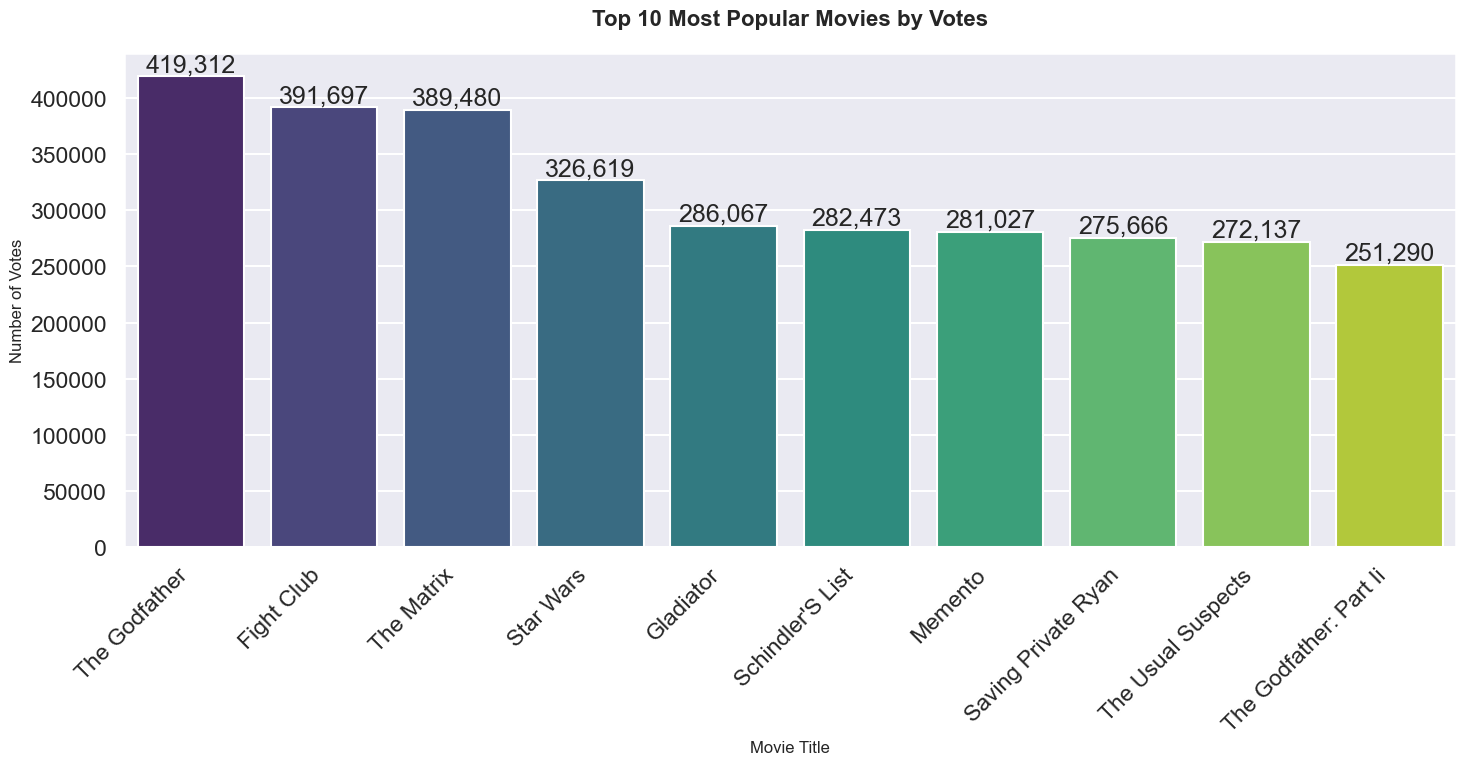

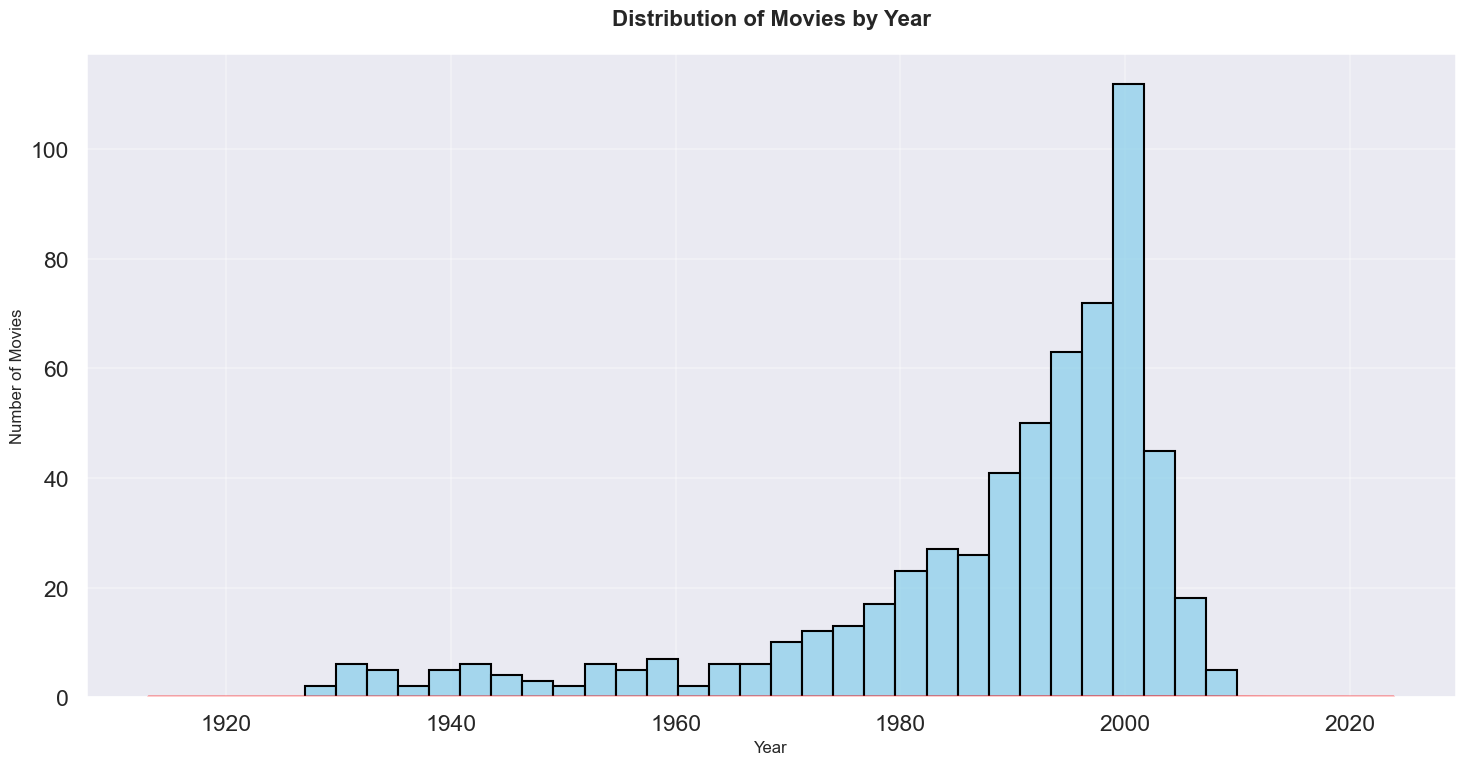

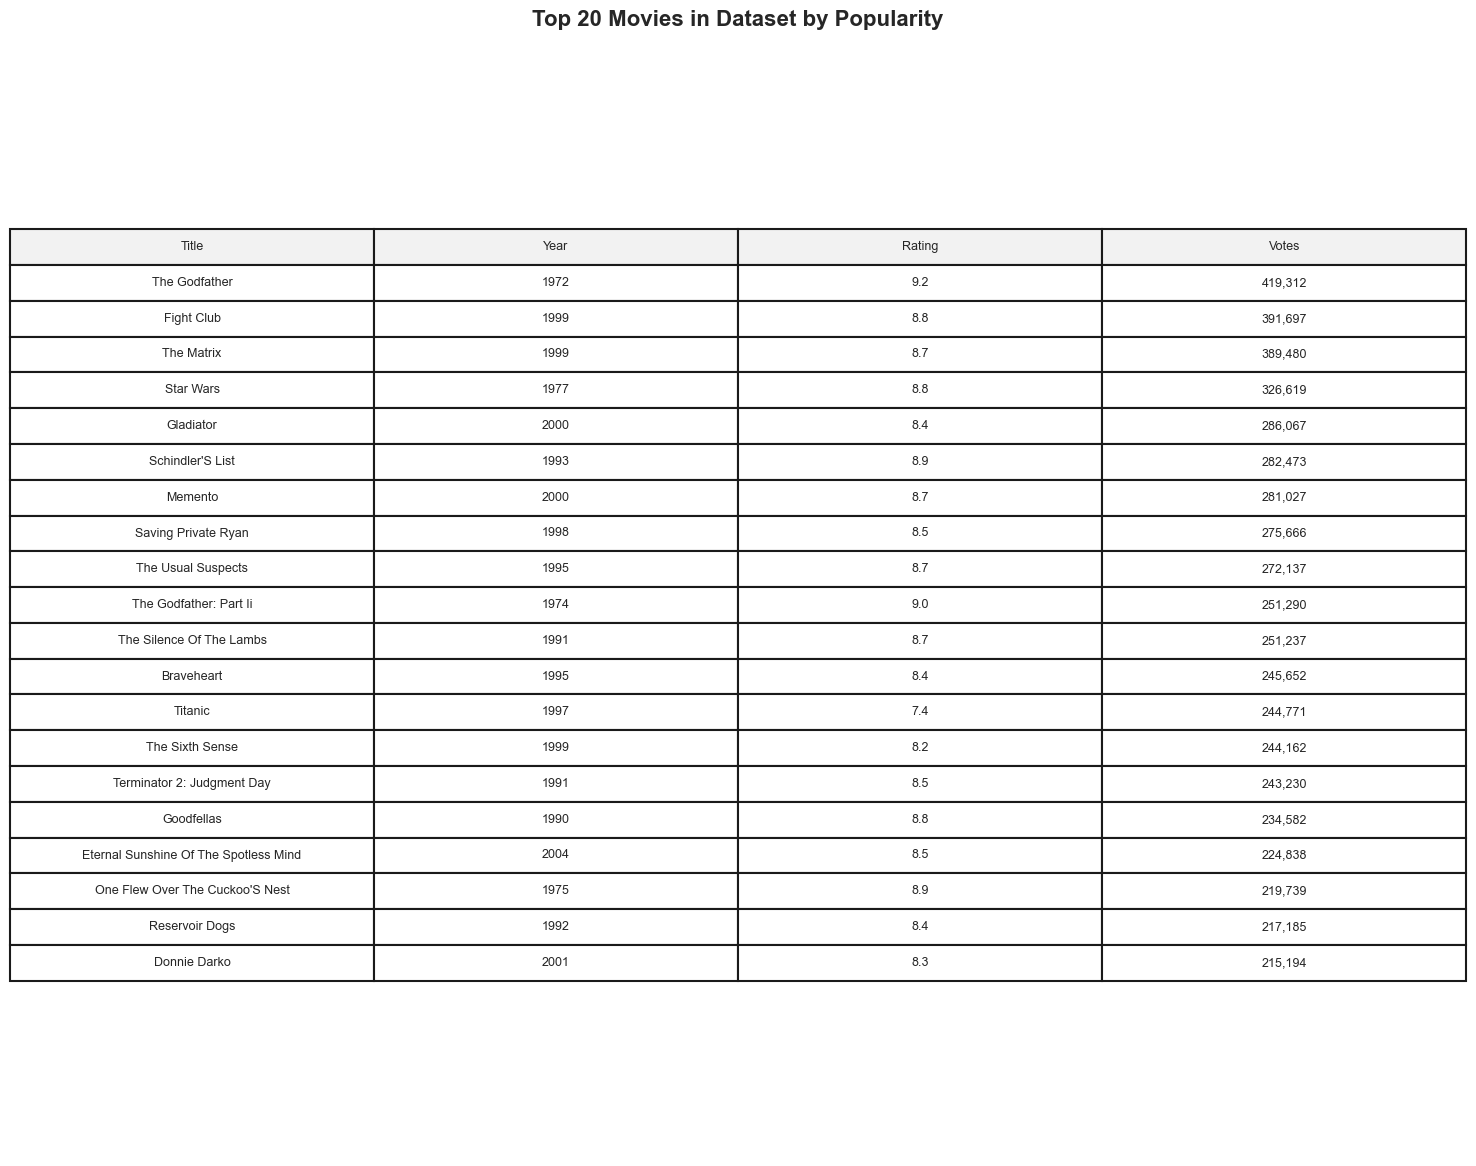

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# ignore future warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Set the style for all plots - using a valid style name
plt.style.use('default')  # Changed from 'seaborn' to 'default'
sns.set_theme()  # This will apply seaborn's default styling
sns.set_palette("husl")
sns.set_context("talk")

# Sort movies by number of votes and rating
top_movies = movie_titles.sort_values(['Votes', 'Rating'], ascending=[False, False])
top_movies['Votes'] = pd.to_numeric(top_movies['Votes'], errors='coerce')
top_movies['Rating'] = pd.to_numeric(top_movies['Rating'], errors='coerce')
# Capitalize movie titles
top_movies['Title'] = top_movies['Title'].str.title()
top_20_movies = top_movies.head(20)

# Create figure for votes plot
plt.figure(figsize=(15, 8))
bar_plot = sns.barplot(
    data=top_20_movies.head(10),
    x='Title',
    y='Votes',
    palette='viridis'
)

# Customize the plot
plt.title('Top 10 Most Popular Movies by Votes', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Movie Title', fontsize=12)
plt.ylabel('Number of Votes', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(top_20_movies['Votes'].head(10)):
    bar_plot.text(i, v, f'{int(v):,}', ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.show()

# Create figure for year distribution
plt.figure(figsize=(15, 8))
years = pd.to_numeric(movie_titles['Year'], errors='coerce').dropna()

sns.histplot(
    data=years,
    bins=30,
    color='skyblue',
    edgecolor='black',
    alpha=0.7
)

# Add a kernel density estimate
sns.kdeplot(data=years, color='red', linewidth=2)

plt.title('Distribution of Movies by Year', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()

# Create a table-like visualization for top 20 movies
plt.figure(figsize=(15, 12))
table_data = top_20_movies[['Title', 'Year', 'Rating', 'Votes']].copy()
table_data['Votes'] = table_data['Votes'].apply(lambda x: f'{int(x):,}')
table_data['Rating'] = table_data['Rating'].round(1)

# Create a table plot
table = plt.table(
    cellText=table_data.values,
    colLabels=table_data.columns,
    cellLoc='center',
    loc='center',
    colColours=['#f2f2f2']*4,
    cellColours=[['#ffffff']*4]*len(table_data)
)

# Customize table appearance
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.8)

# Hide axes
plt.axis('off')

plt.title('Top 20 Movies in Dataset by Popularity', pad=20, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

#### Network Analysis (Undirected Graph)

In [8]:
import networkx as nx

# Construct Character Interaction Network
G = nx.Graph()

for _, row in movie_conversations.iterrows():
    char1, char2 = row['CharacterID1'], row['CharacterID2']
    if G.has_edge(char1, char2):
        G[char1][char2]['weight'] += 1*10
    else:
        G.add_edge(char1, char2, weight=1)

print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

# Degree distribution
degrees = [val for (node, val) in G.degree()]
print("Average degree:", sum(degrees) / len(degrees))


Number of nodes: 9035
Number of edges: 10292
Average degree: 2.27825124515772


In [17]:
!pip3 install git+https://github.com/AminAlam/fa2_modified.git

DEPRECATION: Loading egg at /Users/meliscemre/anaconda3/lib/python3.11/site-packages/fa2_modified-0.3.10-py3.11-macosx-11.1-arm64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/meliscemre/anaconda3/lib/python3.11/site-packages/fa2_modified-0.3.10-py3.11-macosx-11.0-arm64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
  Cloning https://github.com/AminAlam/fa2_modified.git to /private/var/folders/kw/d6by_1pn7vxf__72gxyh5x800000gn/T/pip-req-build-ph_fezsf
  Running command git clone --filter=blob:none --quiet https://github.com/AminAlam/fa2_modified.git /private/var/folders/kw/d6by_1pn7vxf__72gxyh5x800000gn/T/pip-req-build-ph_fezsf
  Resolved https://github.com/

In [19]:
!conda install -c conda-forge fa2_modified

Retrieving notices: ...working... done
Channels:
 - conda-forge
 - defaults
 - pytorch
Platform: osx-arm64
Solving environment: failed

PackagesNotFoundError: The following packages are not available from current channels:

  - fa2_modified

Current channels:

  - https://conda.anaconda.org/conda-forge
  - defaults
  - https://conda.anaconda.org/pytorch/osx-arm64

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [20]:
import matplotlib.pyplot as plt
import networkx as nx
from fa2_modified import ForceAtlas2

# Compute the layout using Force Atlas 2
forceatlas2 = ForceAtlas2(
    outboundAttractionDistribution=False,  # Dissuade hubs
    linLogMode=False,  # NOT lin-lin mode
    adjustSizes=False,  # Prevent overlap (NOT)
    edgeWeightInfluence=1.0,
    jitterTolerance=1.0,
    barnesHutOptimize=True,
    barnesHutTheta=1.2,
    multiThreaded=False,
    scalingRatio=2.0,
    strongGravityMode=False,
    gravity=1.0,
    verbose=True
)

positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=250)

# Draw the network
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, positions, node_size=50, node_color='lightblue', alpha=0.8)
nx.draw_networkx_edges(G, positions, edge_color='red', alpha=0.7, width=5.0)  # Increased width and alpha
plt.axis("off")

# Add a title
plt.title("Character Interaction Network with Force Atlas 2 Layout")
plt.tight_layout()
plt.show()

AttributeError: module 'fa2_modified.fa2util' has no attribute 'Node'

#### DiGraph

In [21]:
# 1. First recreate the directed graph
import networkx as nx
from tqdm import tqdm
import ast

# Create a mapping from LineID to CharacterID
line_to_character = dict(zip(movie_lines['LineID'], movie_lines['CharacterID']))

# Create a directed graph
DG = nx.DiGraph()

# Build the directed graph from the movie conversations
for _, row in tqdm(movie_conversations.iterrows(), total=movie_conversations.shape[0]):
    try:
        # Get the conversation IDs directly
        conversation_ids = ast.literal_eval(row['Conversation'])
        
        # Add edges between consecutive lines
        for i in range(len(conversation_ids) - 1):
            line_id_1 = conversation_ids[i]
            line_id_2 = conversation_ids[i + 1]
            
            char1 = line_to_character.get(line_id_1)
            char2 = line_to_character.get(line_id_2)
            
            if char1 is not None and char2 is not None:
                # Add an edge from char1 to char2
                if DG.has_edge(char1, char2):
                    DG[char1][char2]['weight'] += 1
                else:
                    DG.add_edge(char1, char2, weight=1)
    except Exception as e:
        continue

# Print basic graph statistics to verify the graph was created successfully
print("\nGraph Statistics:")
print(f"Number of nodes: {DG.number_of_nodes()}")
print(f"Number of edges: {DG.number_of_edges()}")

100%|██████████| 83097/83097 [00:03<00:00, 22634.86it/s]


Graph Statistics:
Number of nodes: 9035
Number of edges: 20909


100%|██████████| 500/500 [01:59<00:00,  4.17it/s]


BarnesHut Approximation  took  49.07  seconds
Repulsion forces  took  66.85  seconds
Gravitational forces  took  0.50  seconds
Attraction forces  took  0.07  seconds
AdjustSpeedAndApplyForces step  took  1.77  seconds


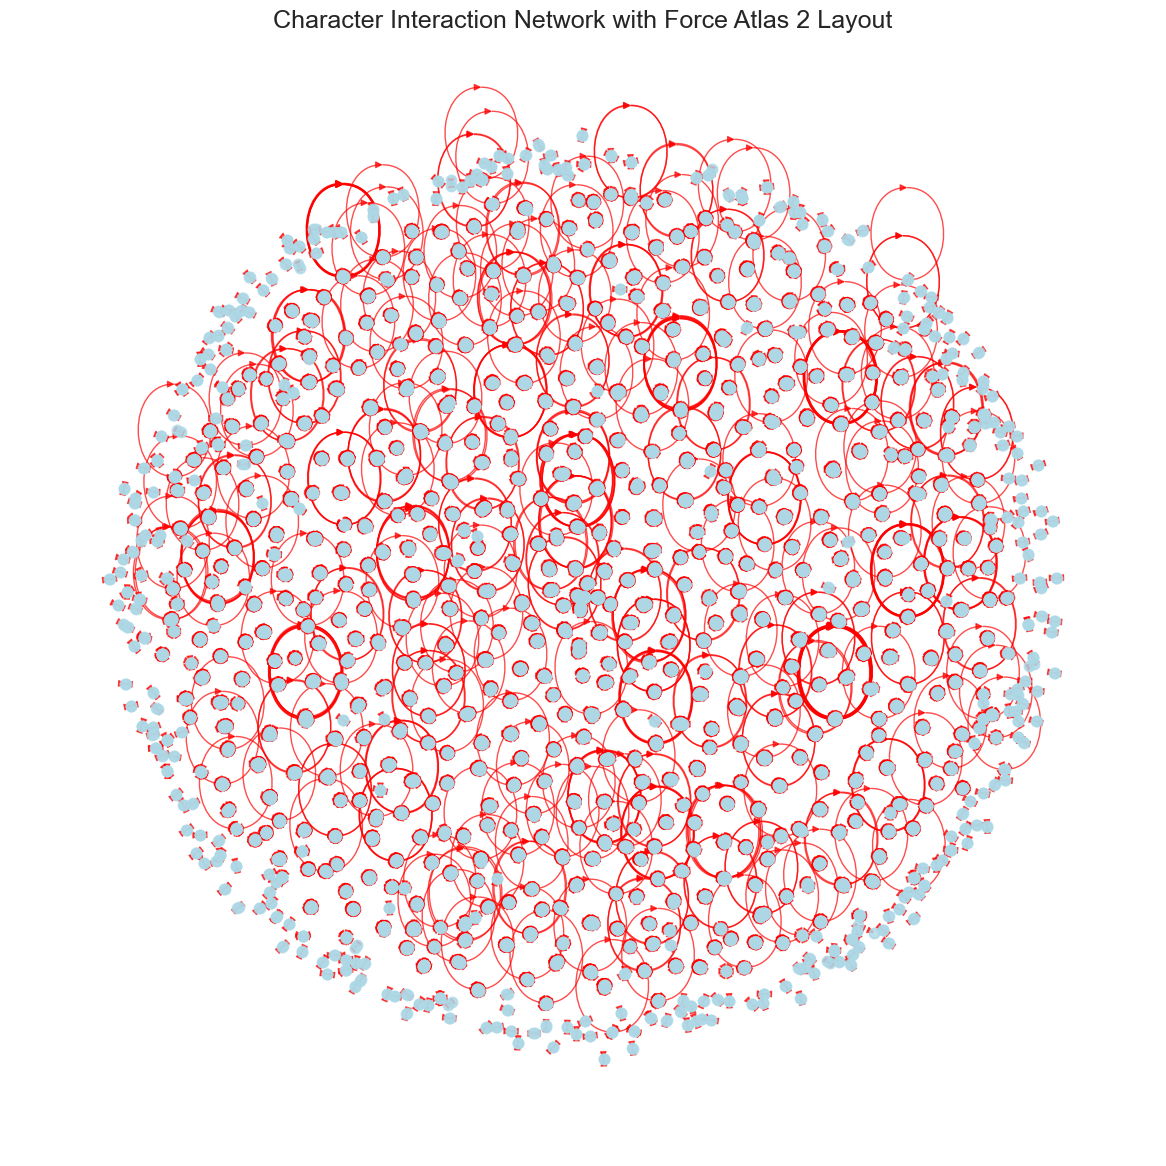

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from fa2_modified import ForceAtlas2

# Compute the layout using Force Atlas 2
forceatlas2 = ForceAtlas2(
    outboundAttractionDistribution=False,  # Dissuade hubs
    linLogMode=False,  # NOT lin-lin mode
    adjustSizes=False,  # Prevent overlap (NOT)
    edgeWeightInfluence=1.0,
    jitterTolerance=1.0,
    barnesHutOptimize=True,
    barnesHutTheta=1.2,
    multiThreaded=False,
    scalingRatio=2.0,
    strongGravityMode=False,
    gravity=1.0,
    verbose=True
)

positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=500)

# Draw the network
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(DG, positions, node_size=50, node_color='lightblue', alpha=0.8)
nx.draw_networkx_edges(DG, positions, edge_color='red', alpha=0.7, width=1.0)  # Increased width and alpha
plt.axis("off")

# Add a title
plt.title("Character Interaction Network with Force Atlas 2 Layout")
plt.tight_layout()
plt.show()

In [22]:
# Import community detection library
from community import community_louvain

# Convert directed graph to undirected for community detection
UG = DG.to_undirected()

# Create louvain communities
partition = community_louvain.best_partition(UG)

# Add communities to the graph
nx.set_node_attributes(DG, partition, 'community')

# Print number of communities
print(f"Number of communities detected: {len(set(partition.values()))}")

# Print size of each community
community_sizes = {}
for node, community_id in partition.items():
    if community_id not in community_sizes:
        community_sizes[community_id] = 0
    community_sizes[community_id] += 1

print("\nCommunity sizes:")
for community_id, size in sorted(community_sizes.items()):
    print(f"Community {community_id}: {size} nodes")

Number of communities detected: 967

Community sizes:
Community 0: 12 nodes
Community 1: 2 nodes
Community 2: 12 nodes
Community 3: 21 nodes
Community 4: 2 nodes
Community 5: 9 nodes
Community 6: 4 nodes
Community 7: 16 nodes
Community 8: 19 nodes
Community 9: 3 nodes
Community 10: 15 nodes
Community 11: 8 nodes
Community 12: 8 nodes
Community 13: 8 nodes
Community 14: 16 nodes
Community 15: 19 nodes
Community 16: 2 nodes
Community 17: 2 nodes
Community 18: 2 nodes
Community 19: 15 nodes
Community 20: 2 nodes
Community 21: 2 nodes
Community 22: 10 nodes
Community 23: 2 nodes
Community 24: 2 nodes
Community 25: 2 nodes
Community 26: 13 nodes
Community 27: 11 nodes
Community 28: 2 nodes
Community 29: 2 nodes
Community 30: 18 nodes
Community 31: 2 nodes
Community 32: 2 nodes
Community 33: 2 nodes
Community 34: 2 nodes
Community 35: 15 nodes
Community 36: 20 nodes
Community 37: 2 nodes
Community 38: 19 nodes
Community 39: 2 nodes
Community 40: 17 nodes
Community 41: 14 nodes
Community 42: 

In [23]:
# Create mappings for characters and their movies
character_names = dict(zip(movie_lines['CharacterID'], movie_lines['CharacterName']))
character_movies = dict(zip(movie_lines['CharacterID'], movie_lines['MovieID']))
movie_titles_dict = dict(zip(movie_titles['MovieID'], movie_titles['Title']))

# Print top 10 communities with character names and their movies
for community_id, size in sorted(community_sizes.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"\nCommunity {community_id}: {size} nodes")
    # Print the characters in each community
    for node in partition.keys():
        if partition[node] == community_id:
            # Get character name and movie
            char_name = character_names.get(node, node)
            movie_id = character_movies.get(node)
            movie_name = movie_titles_dict.get(movie_id, "Unknown Movie")
            print(f"    {char_name} (Movie: {movie_name})")


Community 465: 39 nodes
    GREEN (Movie: casino)
    ACE (Movie: casino)
    SENATOR (Movie: casino)
    STONE (Movie: casino)
    COP #1 (Movie: casino)
    LESTER (Movie: casino)
    BANKER (Movie: casino)
    AMY (Movie: casino)
    NICKY (Movie: casino)
    WEBB (Movie: casino)
    GAGGI (Movie: casino)
    JENNIFER (Movie: casino)
    CHARLIE CLARK (Movie: casino)
    STAGE MANAGER (Movie: casino)
    SHERBERT (Movie: casino)
    GINGER (Movie: casino)
    FEMALE NEWSCASTER (Movie: casino)
    FRANKIE AVALON (Movie: casino)
    WARD (Movie: casino)
    AUSTIN (Movie: casino)
    SIGNALER (Movie: casino)
    JOE (Movie: casino)
    WINNER (Movie: casino)
    AL (Movie: casino)
    COP #2 (Movie: casino)
    SECURITY GUARD #1 (Movie: casino)
    COWBOY (Movie: casino)
    DETECTIVE JOHNSON (Movie: casino)
    DOMINICK (Movie: casino)
    JERRY (Movie: casino)
    EDDY (Movie: casino)
    FBI AGENT #2 (Movie: casino)
    MARINO (Movie: casino)
    HIGH ROLLER (Movie: casino)
    HO

In [24]:
import itertools

# Create a graph where actors are nodes, and edges represent appearing in the same movie
actor_network = nx.Graph()

for movie_id in movie_lines['MovieID'].unique():
    # Get all characters in this movie
    movie_chars = movie_lines[movie_lines['MovieID'] == movie_id]['CharacterID'].unique()
    
    # Create edges between all pairs of characters in this movie
    for char1, char2 in itertools.combinations(movie_chars, 2):
        if actor_network.has_edge(char1, char2):
            # Increment weight if they've worked together before
            actor_network[char1][char2]['weight'] += 1
        else:
            actor_network.add_edge(char1, char2, weight=1, movies=[movie_id])

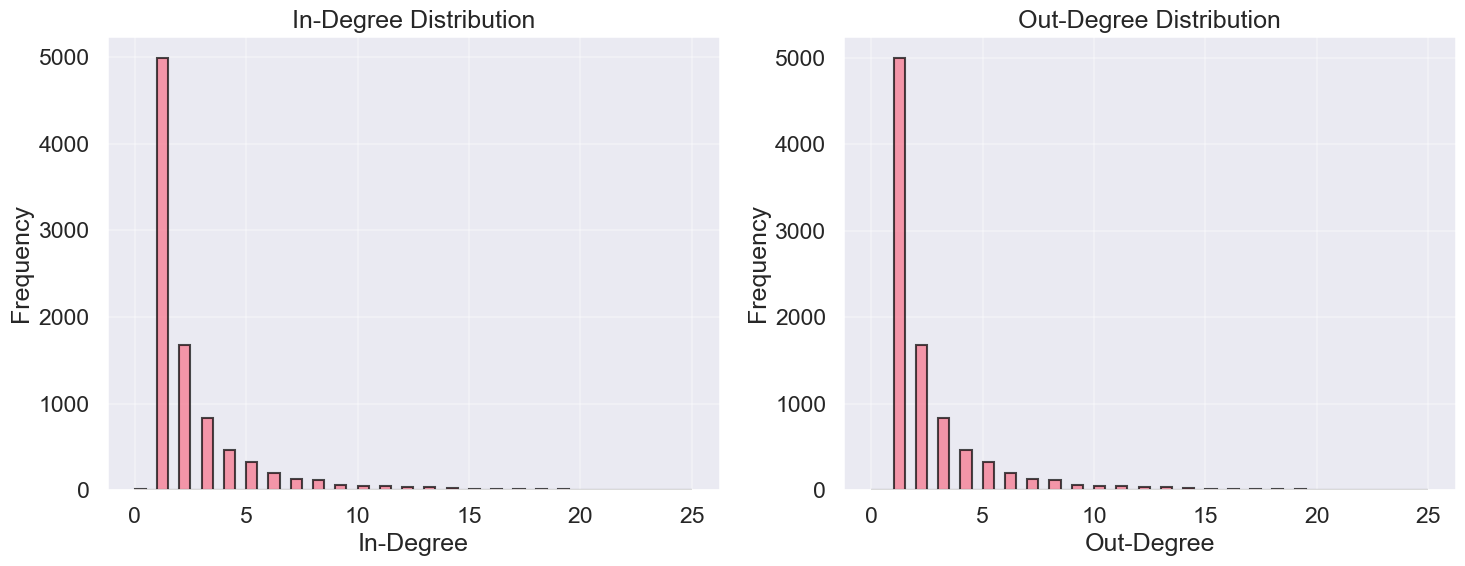


In-Degree Statistics:
Mean: 2.31
Median: 1.00
Max: 25

Out-Degree Statistics:
Mean: 2.31
Median: 1.00
Max: 25


In [25]:
# Calculate in-degree and out-degree distributions
in_degrees = [d for n, d in DG.in_degree()]
out_degrees = [d for n, d in DG.out_degree()]

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot in-degree distribution
ax1.hist(in_degrees, bins=50, edgecolor='black', alpha=0.7)
ax1.set_title("In-Degree Distribution")
ax1.set_xlabel("In-Degree")
ax1.set_ylabel("Frequency")
ax1.grid(True, alpha=0.3)

# Plot out-degree distribution
ax2.hist(out_degrees, bins=50, edgecolor='black', alpha=0.7)
ax2.set_title("Out-Degree Distribution")
ax2.set_xlabel("Out-Degree")
ax2.set_ylabel("Frequency")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print some basic statistics
print("\nIn-Degree Statistics:")
print(f"Mean: {np.mean(in_degrees):.2f}")
print(f"Median: {np.median(in_degrees):.2f}")
print(f"Max: {np.max(in_degrees)}")

print("\nOut-Degree Statistics:")
print(f"Mean: {np.mean(out_degrees):.2f}")
print(f"Median: {np.median(out_degrees):.2f}")
print(f"Max: {np.max(out_degrees)}")

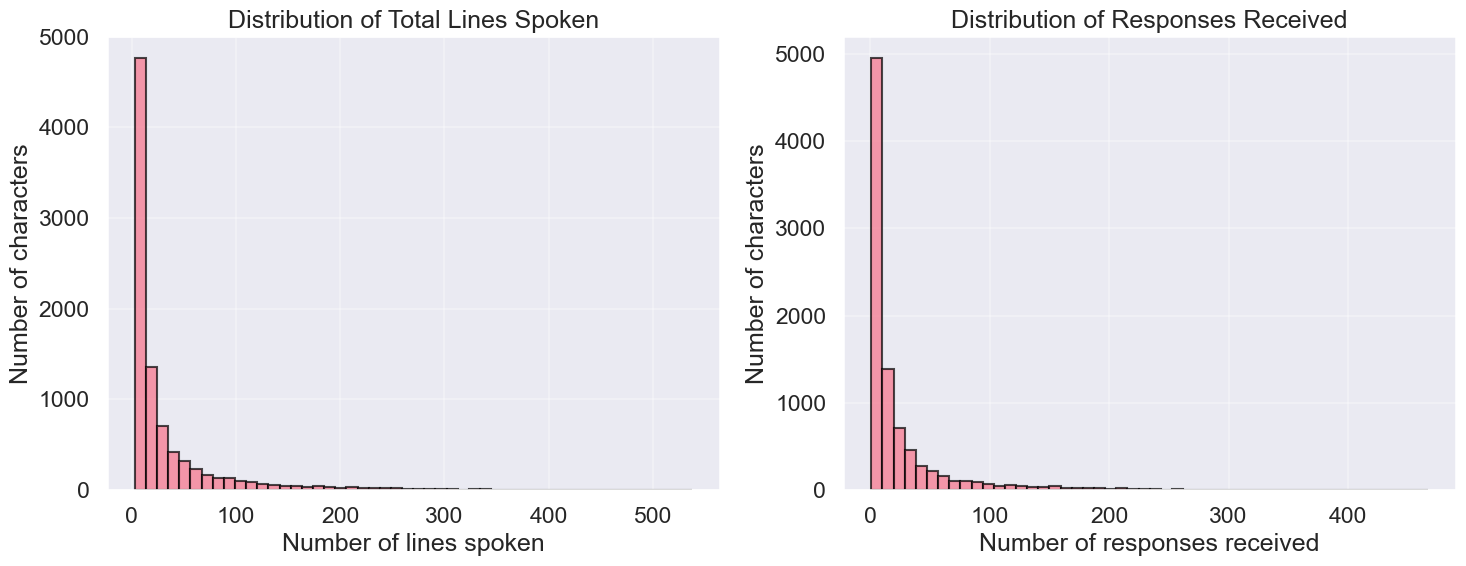


Top 5 Characters by Lines Spoken:
DANTE from 'clerks.': 537 lines
BEN from 'the graduate': 489 lines
JOE from 'innerspace': 472 lines
ALVY from 'annie hall': 467 lines
ACE from 'casino': 465 lines

Top 5 Characters by Responses Received:
DANTE from 'clerks.': 467 responses
DANTE: 467 responses
ALVY from 'annie hall': 393 responses
ALVY: 393 responses
BEN from 'the graduate': 385 responses
BEN: 385 responses
MASON from 'chill factor': 382 responses
MASON: 382 responses
ARLO +++$+++ from 'chill factor': 371 responses
ARLO +++$+++: 371 responses


In [26]:
# Create a directed graph that tracks different types of interactions
DG = nx.DiGraph()

char_names = dict(zip(movie_lines['CharacterID'], movie_lines['CharacterName']))

# Track total lines spoken and lines received separately
character_lines_spoken = {}
character_lines_received = {}

for _, row in movie_conversations.iterrows():
    try:
        conversation_ids = ast.literal_eval(row['Conversation'])
        
        # Count total lines spoken by each character
        for line_id in conversation_ids:
            speaker = line_to_character.get(line_id)
            if speaker:
                character_lines_spoken[speaker] = character_lines_spoken.get(speaker, 0) + 1
        
        # Count responses received
        for i in range(len(conversation_ids) - 1):
            current_speaker = line_to_character.get(conversation_ids[i])
            next_speaker = line_to_character.get(conversation_ids[i + 1])
            
            if current_speaker:
                character_lines_received[current_speaker] = character_lines_received.get(current_speaker, 0) + 1
                
    except:
        continue

# Create plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot distribution of total lines spoken
ax1.hist(list(character_lines_spoken.values()), bins=50, edgecolor='black', alpha=0.7)
ax1.set_title("Distribution of Total Lines Spoken")
ax1.set_xlabel("Number of lines spoken")
ax1.set_ylabel("Number of characters")
ax1.grid(True, alpha=0.3)

# Plot distribution of responses received
ax2.hist(list(character_lines_received.values()), bins=50, edgecolor='black', alpha=0.7)
ax2.set_title("Distribution of Responses Received")
ax2.set_xlabel("Number of responses received")
ax2.set_ylabel("Number of characters")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Create a mapping of character names that includes both role and actor names
char_names = {}
for _, row in movie_lines.iterrows():
    char_id = row['CharacterID']
    char_name = row['CharacterName']
    # Some character names include the actor name after ' / '
    if ' / ' in str(char_name):
        role, actor = char_name.split(' / ')
        char_names[char_id] = f"{role} (played by {actor})"
    else:
        char_names[char_id] = char_name

# Get movie information for each character
char_movie = dict(zip(movie_lines['CharacterID'], movie_lines['MovieID']))
movie_name = dict(zip(movie_titles['MovieID'], movie_titles['Title']))

print("\nTop 5 Characters by Lines Spoken:")
for char_id, count in sorted(character_lines_spoken.items(), key=lambda x: x[1], reverse=True)[:5]:
    character = char_names.get(char_id, char_id)
    movie = movie_name.get(char_movie.get(char_id, ''), 'Unknown Movie')
    print(f"{character} from '{movie}': {count} lines")

print("\nTop 5 Characters by Responses Received:")
for char_id, count in sorted(character_lines_received.items(), key=lambda x: x[1], reverse=True)[:5]:
    character = char_names.get(char_id, char_id)
    movie = movie_name.get(char_movie.get(char_id, ''), 'Unknown Movie')
    print(f"{character} from '{movie}': {count} responses")
    print(f"{char_names.get(char_id, char_id)}: {count} responses")

In [27]:
import networkx as nx
from tqdm import tqdm

# Create a mapping from LineID to CharacterID
line_to_character = dict(zip(movie_lines['LineID'], movie_lines['CharacterID']))

# Create a directed graph
DG = nx.DiGraph()

# Print a sample of the conversation data to understand its structure
print("Sample conversation data:")
print(movie_conversations['Conversation'].iloc[0])

# Build the directed graph from the movie conversations
for _, row in tqdm(movie_conversations.iterrows(), total=movie_conversations.shape[0]):
    try:
        # Get the conversation IDs directly
        conversation_ids = eval(row['Conversation'])  # Using eval since the data is a string representation of a list
        
        # Add edges between consecutive lines
        for i in range(len(conversation_ids) - 1):
            line_id_1 = conversation_ids[i]
            line_id_2 = conversation_ids[i + 1]
            
            char1 = line_to_character.get(line_id_1)
            char2 = line_to_character.get(line_id_2)
            
            if char1 is not None and char2 is not None:
                # Add an edge from char1 to char2
                if DG.has_edge(char1, char2):
                    DG[char1][char2]['weight'] += 1
                else:
                    DG.add_edge(char1, char2, weight=1)
    except Exception as e:
        continue

# Print basic graph statistics
print("\nGraph Statistics:")
print(f"Number of nodes: {DG.number_of_nodes()}")
print(f"Number of edges: {DG.number_of_edges()}")

# Print additional statistics
print("\nDetailed Graph Statistics:")
print(f"Number of nodes (unique characters): {DG.number_of_nodes()}")
print(f"Number of edges (character interactions): {DG.number_of_edges()}")
print(f"Average degree: {sum(dict(DG.degree()).values()) / DG.number_of_nodes():.2f}")
print(f"Number of strongly connected components: {nx.number_strongly_connected_components(DG)}")

# Print edge weight distribution
weights = [data['weight'] for _, _, data in DG.edges(data=True)]
print(f"\nEdge weight statistics:")
print(f"Min weight: {min(weights)}")
print(f"Max weight: {max(weights)}")
print(f"Average weight: {sum(weights)/len(weights):.2f}")


Sample conversation data:
['L194', 'L195', 'L196', 'L197']


100%|██████████| 83097/83097 [00:03<00:00, 22615.66it/s]


Graph Statistics:
Number of nodes: 9035
Number of edges: 20909

Detailed Graph Statistics:
Number of nodes (unique characters): 9035
Number of edges (character interactions): 20909
Average degree: 4.63
Number of strongly connected components: 984

Edge weight statistics:
Min weight: 1
Max weight: 291
Average weight: 10.60


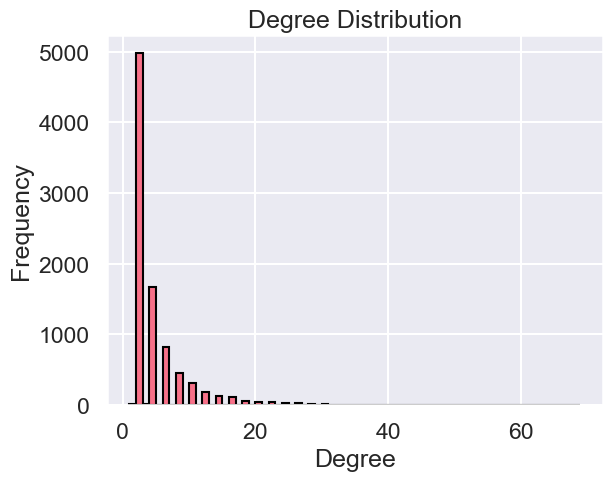

In [28]:
# plot the degree distribution
degrees = [val for (node, val) in DG.degree()]
plt.hist(degrees, bins=range(1, max(degrees)+20), edgecolor='black')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()


In [29]:
# Find the edge with maximum weight
max_weight_edge = max(DG.edges(data=True), key=lambda x: x[2]['weight'])
char1, char2, weight_data = max_weight_edge

# Get character names
char1_name = movie_lines[movie_lines['CharacterID'] == char1]['CharacterName'].iloc[0]
char2_name = movie_lines[movie_lines['CharacterID'] == char2]['CharacterName'].iloc[0]

print("\nMost Frequent Character Interaction:")
print(f"Between: {char1_name} and {char2_name}")
print(f"Number of interactions: {weight_data['weight']}")

# Find movie these characters appear in
movie_id = movie_lines[
    (movie_lines['CharacterID'] == char1) | 
    (movie_lines['CharacterID'] == char2)
]['MovieID'].iloc[0]

# Get and print movie title
movie_info = movie_titles[movie_titles['MovieID'] == movie_id].iloc[0]
print(f"\nMovie Details:")
print(f"Title: {movie_info['Title']}")
print(f"Year: {movie_info['Year']}")
print(f"Rating: {movie_info['Rating']}")
print(f"Votes: {movie_info['Votes']}")


Most Frequent Character Interaction:
Between: ALVY and ANNIE
Number of interactions: 291

Movie Details:
Title: annie hall
Year: 1977
Rating: 8.3
Votes: 66781


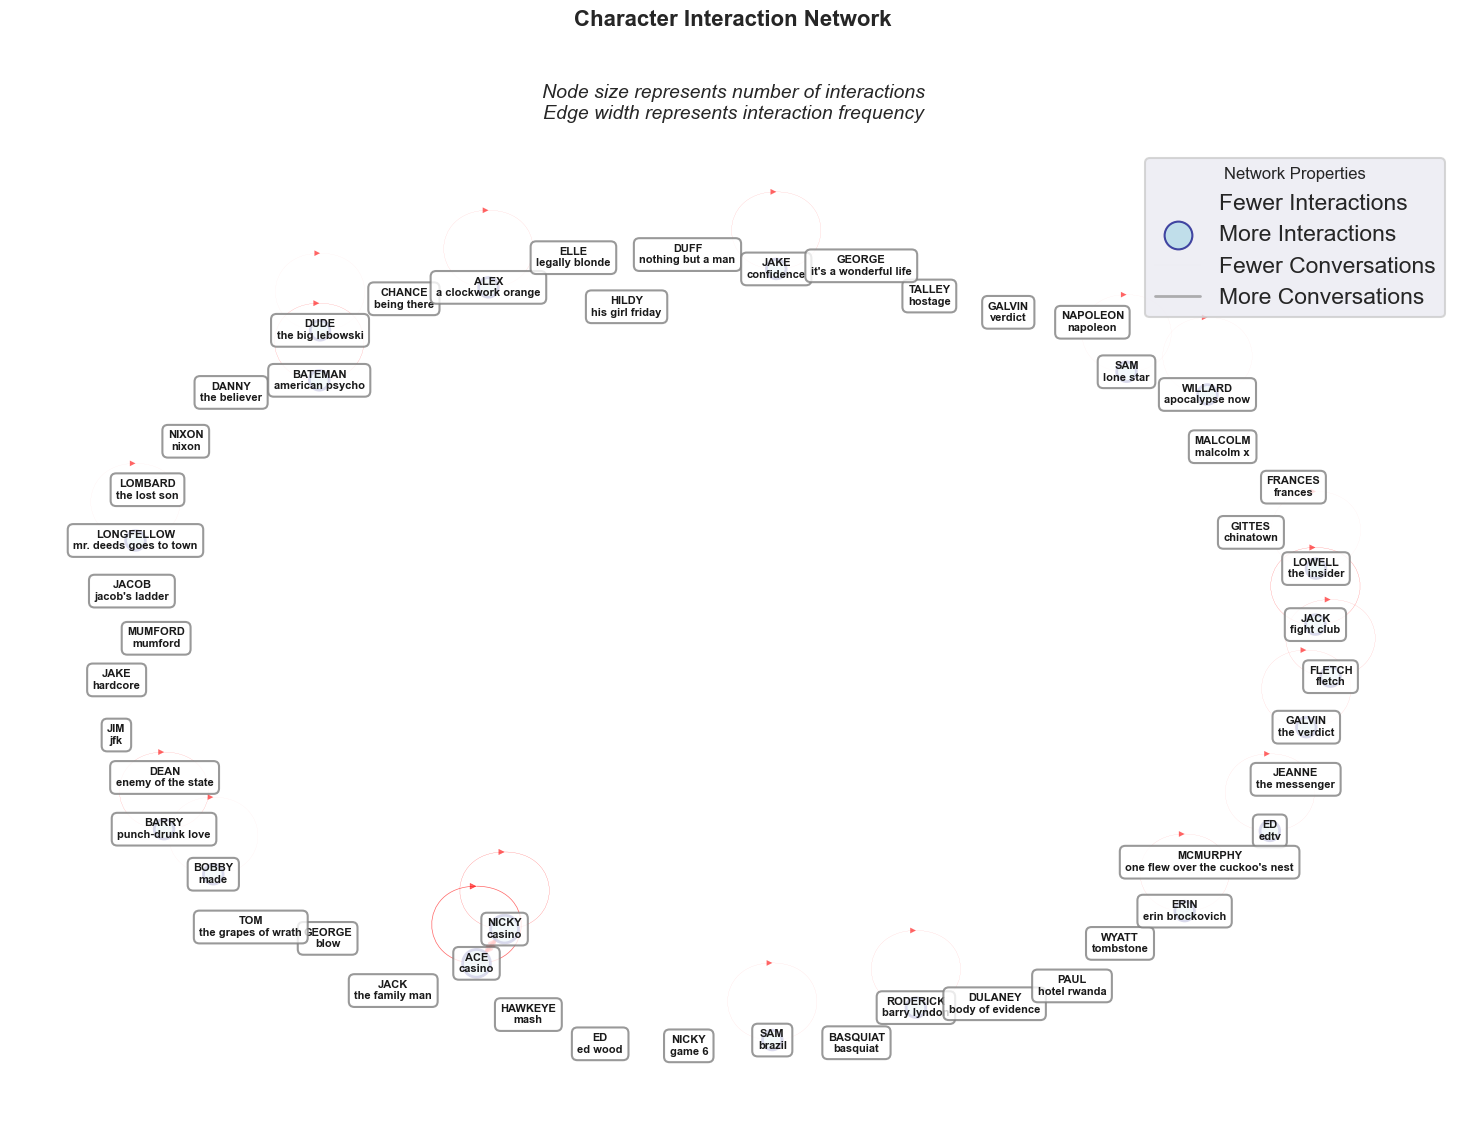

In [30]:
# Create necessary mappings
character_movie_dict = dict(zip(movie_lines['CharacterID'], movie_lines['MovieID']))
movie_dict = dict(zip(movie_titles['MovieID'], movie_titles['Title']))
character_names = dict(zip(movie_lines['CharacterID'], movie_lines['CharacterName']))

# Create a smaller subgraph of the most active characters
top_nodes = [n for n, d in sorted(DG.degree(), key=lambda x: x[1], reverse=True)[:50]]
subgraph = DG.subgraph(top_nodes)

# Create figure and axis with larger size
fig, ax = plt.subplots(figsize=(15, 12))
fig.suptitle("Character Interaction Network", fontsize=16, fontweight='bold', y=0.95)
ax.set_title("Node size represents number of interactions\nEdge width represents interaction frequency", 
             fontsize=14, style='italic', pad=20)

# Compute positions with more spacing
pos = nx.spring_layout(subgraph, k=2, iterations=100, seed=42)

# Extract node sizes based on degree
node_sizes = [subgraph.degree(n) * 100 for n in subgraph.nodes()]

# Draw nodes with enhanced appearance
nx.draw_networkx_nodes(
    subgraph, 
    pos, 
    ax=ax, 
    node_size=node_sizes, 
    node_color='lightblue',
    edgecolors='navy',
    linewidths=2,
    alpha=0.7
)

# Create enhanced labels with character names and movie titles
labels = {}
for node in subgraph.nodes():
    char_name = character_names.get(node, "Unknown")
    movie_id = character_movie_dict.get(node)
    movie_name = movie_dict.get(movie_id, "Unknown")
    
    # Split character name if it contains actor name
    if " / " in char_name:
        character, actor = char_name.split(" / ")
        label = f"{character}\n({actor})"
    else:
        label = char_name
        
    labels[node] = f"{label}\n{movie_name}"

# Draw labels with improved visibility
nx.draw_networkx_labels(
    subgraph, 
    pos, 
    ax=ax, 
    labels=labels,
    font_size=8,
    font_weight='bold',
    font_family="sans-serif",
    bbox=dict(facecolor='white', 
             edgecolor='gray',
             alpha=0.8,
             boxstyle='round,pad=0.5')
)

# Draw edges with varying width based on weight
edge_weights = [DG[u][v].get('weight', 1) for u, v in subgraph.edges()]
if edge_weights:  # Check if there are any edges
    max_weight = max(edge_weights)
    normalized_weights = [2 * w/max_weight for w in edge_weights]
    
    nx.draw_networkx_edges(
        subgraph,
        pos,
        ax=ax,
        width=normalized_weights,
        edge_color='red',
        alpha=0.6,
        arrows=True,
        arrowsize=10
    )

# Remove axis
ax.axis('off')

# Add legend for node sizes
sizes = [min(node_sizes), max(node_sizes)]
labels_size = ['Fewer Interactions', 'More Interactions']
legend_elements = [plt.scatter([], [], s=size, c='lightblue', 
                             edgecolor='navy', label=label, alpha=0.7)
                  for size, label in zip(sizes, labels_size)]

# Add legend for edge weights if there are edges
if edge_weights:
    weights = [min(edge_weights), max(edge_weights)]
    labels_weight = ['Fewer Conversations', 'More Conversations']
    for w, label in zip(weights, labels_weight):
        legend_elements.append(plt.Line2D([0], [0], color='gray', 
                                        linewidth=2*w/max_weight,
                                        label=label, alpha=0.6))

ax.legend(handles=legend_elements, loc='upper right', 
         title='Network Properties', title_fontsize=12)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### Degree Distribution

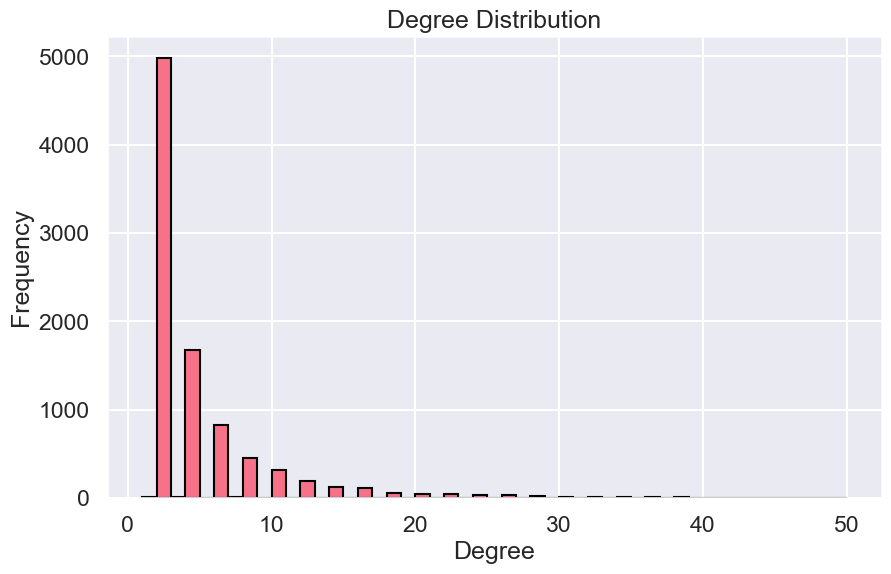

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(degrees, bins=range(1, max(degrees)+1), edgecolor='black')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()


In [32]:
import ast
import networkx as nx
from tqdm import tqdm

# Create a mapping from LineID to CharacterID
line_to_character = dict(zip(movie_lines['LineID'], movie_lines['CharacterID']))

# Create a directed graph
DG = nx.DiGraph()

# Build the directed graph from the movie conversations
for _, row in tqdm(movie_conversations.iterrows(), total=movie_conversations.shape[0]):
    try:
        conversation_ids = ast.literal_eval(row['Conversation'])
    except (ValueError, SyntaxError):
        continue  # Skip if the conversation cannot be parsed
    for i in range(len(conversation_ids) - 1):
        line_id_1 = conversation_ids[i]
        line_id_2 = conversation_ids[i + 1]
        char1 = line_to_character.get(line_id_1)
        char2 = line_to_character.get(line_id_2)
        if char1 is None or char2 is None:
            continue  # Skip if character IDs are missing
        # Add an edge from char1 to char2
        if DG.has_edge(char1, char2):
            DG[char1][char2]['weight'] += 1
        else:
            DG.add_edge(char1, char2, weight=1)


100%|██████████| 83097/83097 [00:03<00:00, 22936.37it/s]


#### Text Analysis

In [33]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import ast

nltk.download('vader_lexicon')

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Fill missing texts with empty strings
movie_lines['Text'] = movie_lines['Text'].fillna('')

# Map LineID to Text
line_dict = dict(zip(movie_lines['LineID'], movie_lines['Text']))

# Analyze sentiments in conversations
conversation_sentiments = []
for _, row in movie_conversations.iterrows():
    # Safely evaluate the string representation of the list
    conversation = ast.literal_eval(row['Conversation'])  # Use ast.literal_eval instead of eval
    # Fetch texts for each LineID, defaulting to empty string if not found
    conversation_texts = [line_dict.get(line_id, '') for line_id in conversation]
    # Ensure all items are strings (filter out None if any)
    conversation_texts = [text if text is not None else '' for text in conversation_texts]
    # Join the texts into a single string
    conversation_text = ' '.join(conversation_texts)
    # Analyze the sentiment
    sentiment = sia.polarity_scores(conversation_text)
    conversation_sentiments.append(sentiment)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/meliscemre/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [49]:
conversation_sentiments

[{'neg': 0.01247578513622284,
  'neu': 0.7071444576382637,
  'pos': 0.28037975722551345,
  'compound': 0.2428581924498081},
 {'neg': 0.113, 'neu': 0.656, 'pos': 0.231, 'compound': 0.4527},
 {'neg': 0.193, 'neu': 0.662, 'pos': 0.145, 'compound': -0.3818},
 {'neg': 0.178, 'neu': 0.667, 'pos': 0.155, 'compound': -0.204},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.057, 'neu': 0.697, 'pos': 0.246, 'compound': 0.9362},
 {'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'compound': 0.2732},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.117, 'neu': 0.797, 'pos': 0.086, 'compound': -0.2406},
 {'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound': 0.4588},
 {'neg': 0.069, 'neu': 0.84, 'pos': 0.091, 'compound': 0.1561},
 {'neg': 0.0, 'neu': 0.94, 'pos': 0.06, 'compound': 0.1655},
 {'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'compound': 0.9311},
 {'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'compound': 0.3612},
 {'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.296},
 {

#### Integrating Networks and Text

In [34]:
# Assign sentiment scores to edges
for idx, (_, row) in enumerate(movie_conversations.iterrows()):
    char1, char2 = row['CharacterID1'], row['CharacterID2']
    sentiment = conversation_sentiments[idx]
    if G.has_edge(char1, char2):
        if 'sentiment' in G[char1][char2]:
            # Average the sentiments
            for key in sentiment:
                G[char1][char2]['sentiment'][key] = (G[char1][char2]['sentiment'][key] + sentiment[key]) / 2
        else:
            G[char1][char2]['sentiment'] = sentiment

# Sample edge attributes
for u, v, data in list(G.edges(data=True))[:5]:
    print(f"Edge ({u}, {v}) has attributes {data}")


Edge (u0, u2) has attributes {'weight': 241, 'sentiment': {'neg': 0.01247578513622284, 'neu': 0.7071444576382637, 'pos': 0.28037975722551345, 'compound': 0.2428581924498081}}
Edge (u0, u3) has attributes {'weight': 61, 'sentiment': {'neg': 0.006609375000000001, 'neu': 0.967734375, 'pos': 0.02565625, 'compound': 0.069071875}}
Edge (u0, u4) has attributes {'weight': 51, 'sentiment': {'neg': 0.027, 'neu': 0.85653125, 'pos': 0.11646875, 'compound': 0.228978125}}
Edge (u0, u5) has attributes {'weight': 171, 'sentiment': {'neg': 0.038111770629882816, 'neu': 0.9358338012695313, 'pos': 0.026058212280273437, 'compound': -0.05326019592285157}}
Edge (u0, u11) has attributes {'weight': 81, 'sentiment': {'neg': 0.113625, 'neu': 0.77920703125, 'pos': 0.10716796875000001, 'compound': -0.17263359375}}


#### Visualization of Sentiment on Edges

/var/folders/kw/d6by_1pn7vxf__72gxyh5x800000gn/T/ipykernel_2375/2448752872.py:70: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  edges_collection = nx.draw_networkx_edges(


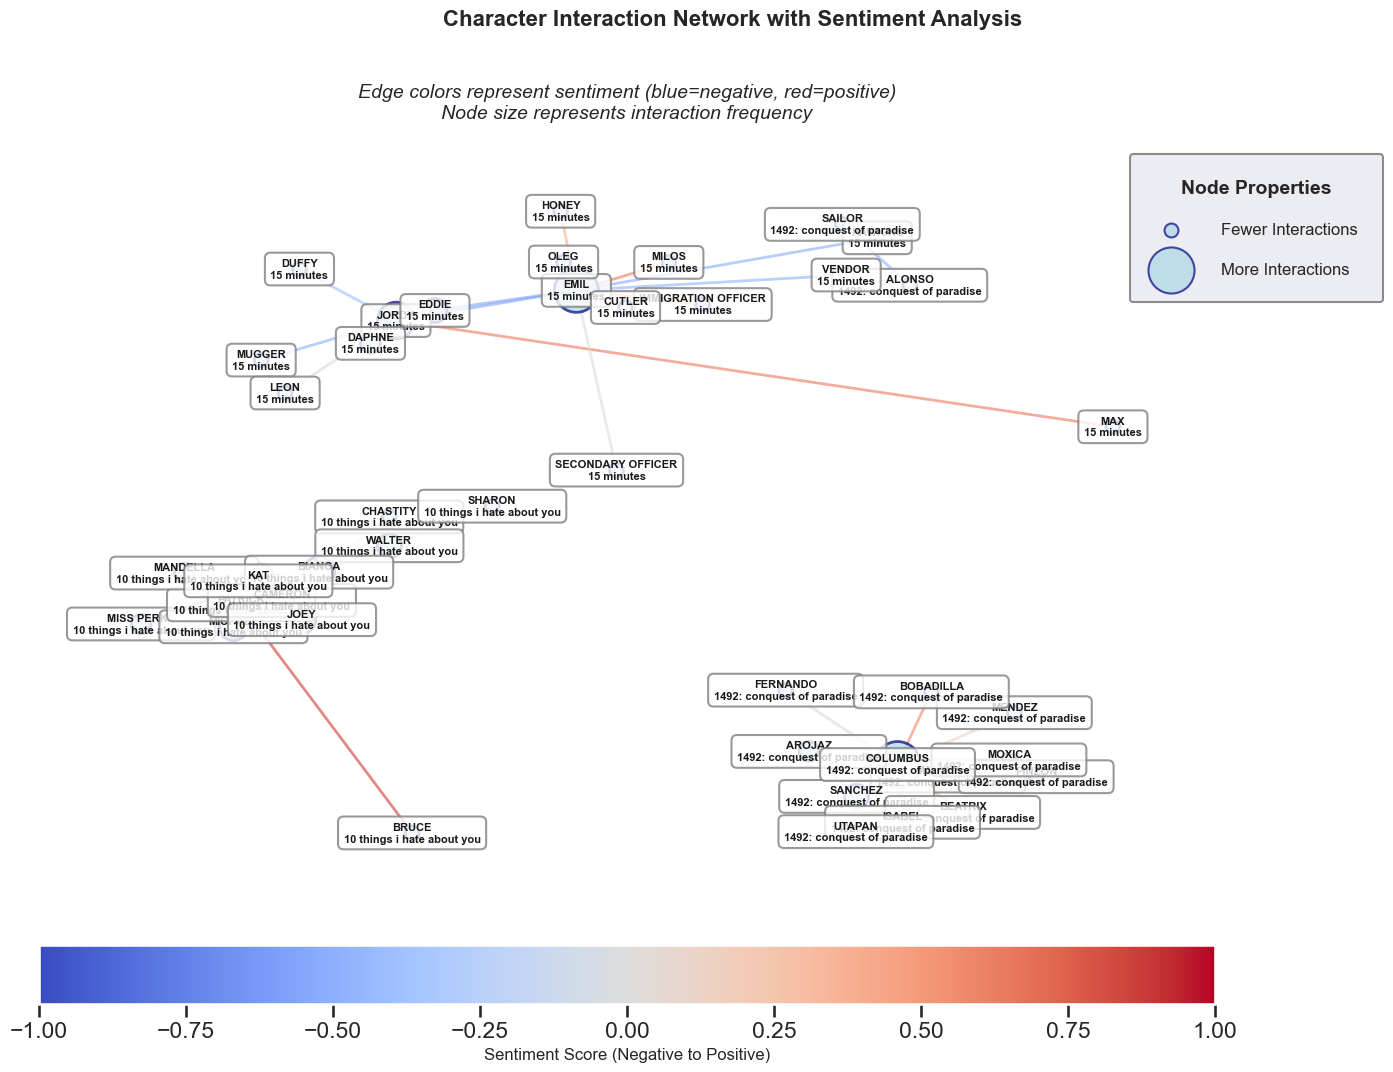

In [35]:
# import matplotlib.pyplot as plt
import matplotlib as mpl

# Create necessary mappings and subgraph setup
character_movie_dict = dict(zip(movie_lines['CharacterID'], movie_lines['MovieID']))
movie_dict = dict(zip(movie_titles['MovieID'], movie_titles['Title']))
character_names = dict(zip(movie_lines['CharacterID'], movie_lines['CharacterName']))

# Create a subgraph of edges that have sentiment data
edges_with_sentiment = [(u, v) for u, v, data in G.edges(data=True) if 'sentiment' in data]
subgraph = G.edge_subgraph(edges_with_sentiment[:50])

# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 12))
fig.suptitle("Character Interaction Network with Sentiment Analysis", fontsize=16, fontweight='bold', y=0.95)
ax.set_title("Edge colors represent sentiment (blue=negative, red=positive)\nNode size represents interaction frequency", 
             fontsize=14, style='italic', pad=20)

# Compute positions with more spacing
pos = nx.spring_layout(subgraph, k=2, iterations=100, seed=42)

# Extract node sizes based on degree
node_sizes = [subgraph.degree(n) * 100 for n in subgraph.nodes()]

# Draw nodes
nx.draw_networkx_nodes(
    subgraph, 
    pos, 
    ax=ax, 
    node_size=node_sizes, 
    node_color='lightblue',
    edgecolors='navy',
    linewidths=2,
    alpha=0.7
)

# Create enhanced labels with character names and movie titles
labels = {}
for node in subgraph.nodes():
    char_name = character_names.get(node, "Unknown")
    movie_id = character_movie_dict.get(node)
    movie_name = movie_dict.get(movie_id, "Unknown")
    
    # Split character name if it contains actor name
    if " / " in char_name:
        character, actor = char_name.split(" / ")
        label = f"{character}\n({actor})"
    else:
        label = char_name
    
    labels[node] = f"{label}\n{movie_name}"

# Draw labels with improved visibility
nx.draw_networkx_labels(
    subgraph, 
    pos, 
    ax=ax, 
    labels=labels,
    font_size=8,
    font_weight='bold',
    font_family="sans-serif",
    bbox=dict(facecolor='white', 
             edgecolor='gray',
             alpha=0.8,
             boxstyle='round,pad=0.5')
)

# Draw edges with sentiment colors
edge_colors = [data['sentiment']['compound'] for _, _, data in subgraph.edges(data=True)]
edges_collection = nx.draw_networkx_edges(
    subgraph,
    pos,
    ax=ax,
    edge_color=edge_colors,
    edge_cmap=plt.cm.coolwarm,
    edge_vmin=-1,
    edge_vmax=1,
    width=2,
    alpha=0.6,
    arrows=True,
    arrowsize=10
)

# Add colorbar
sm = mpl.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm=plt.Normalize(vmin=-1, vmax=1))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation="horizontal", pad=0.05)
cbar.set_label('Sentiment Score (Negative to Positive)', fontsize=12)

# Add legend with larger size and more padding
sizes = [min(node_sizes), max(node_sizes)]
labels_size = ['Fewer Interactions', 'More Interactions']
legend_elements = [plt.scatter([], [], s=size, c='lightblue', 
                             edgecolor='navy', label=label, alpha=0.7)
                  for size, label in zip(sizes, labels_size)]

# Create legend with increased font size and padding
legend = ax.legend(handles=legend_elements, 
                  loc='upper right',
                  title='Node Properties',
                  title_fontsize=14,  # Increased from 12
                  fontsize=12,        # Added explicit font size for labels
                  borderpad=1.5,      # Increased padding inside legend border
                  labelspacing=1.5,   # Increased spacing between legend entries
                  handletextpad=2,    # Increased spacing between handle and text
                  bbox_to_anchor=(1.15, 1.0),  # Moved legend slightly right
                  frameon=True,       # Ensure frame is visible
                  framealpha=0.9,     # Make background more opaque
                  edgecolor='gray')   # Add edge color to legend box

# Make the legend title bold
legend.get_title().set_fontweight('bold')

# Previous code for removing axis and adjusting layout remains the same...
ax.axis('off')
# Adjusted rect to accommodate larger legend
plt.tight_layout(rect=[0, 0.03, 0.95, 0.95])  # Left more space on the right
plt.show()

/var/folders/kw/d6by_1pn7vxf__72gxyh5x800000gn/T/ipykernel_2375/964687123.py:64: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  edges = nx.draw_networkx_edges(GF, pos,


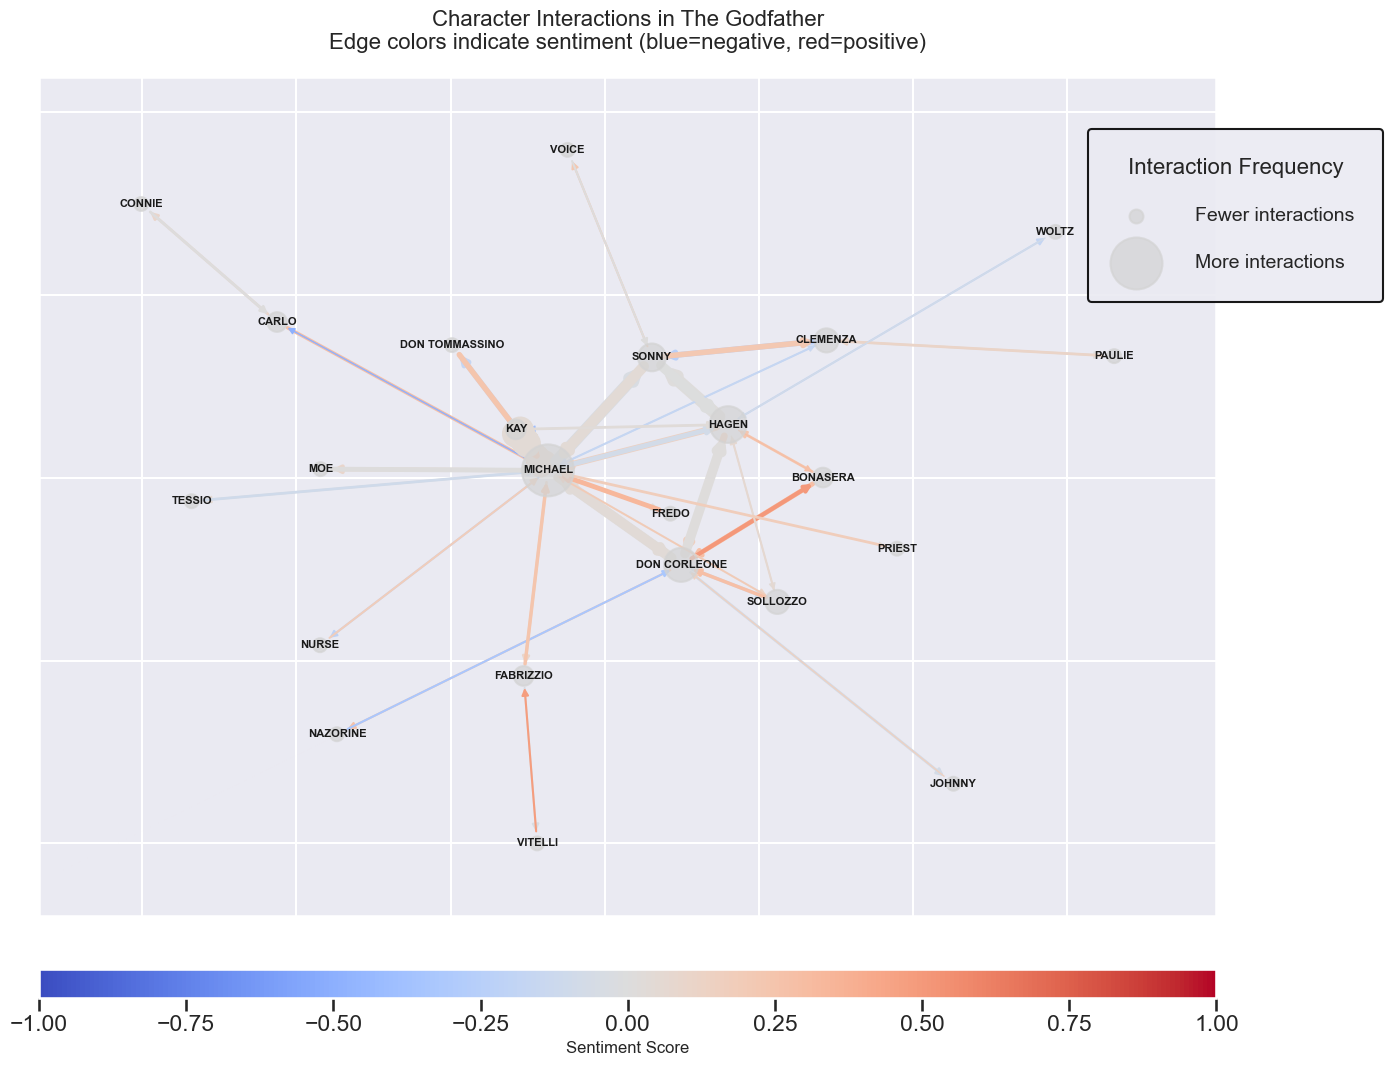


Network Statistics for The Godfather:
Number of characters: 23
Number of interactions: 58
Average interactions per character: 2.5

Most central characters:
MICHAEL: 1.273
HAGEN: 0.636
DON CORLEONE: 0.545
SONNY: 0.364
CLEMENZA: 0.273


In [36]:
# Get Godfather's MovieID and conversations
godfather_id = movie_titles[movie_titles['Title'].str.contains('Godfather', case=False, na=False)].iloc[0]['MovieID']
godfather_convos = movie_conversations[movie_conversations['MovieID'] == godfather_id]

# Create a directed graph for Godfather interactions with sentiment
GF = nx.DiGraph()

# Create character names dictionary only for characters in the movie
godfather_lines = movie_lines[movie_lines['MovieID'] == godfather_id]
char_names = dict(zip(godfather_lines['CharacterID'], godfather_lines['CharacterName']))

# Initialize sentiment analyzer if not already done
if 'sia' not in locals():
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()

# Build the graph with sentiment analysis
for _, row in godfather_convos.iterrows():
    try:
        conversation_ids = ast.literal_eval(row['Conversation'])
        for i in range(len(conversation_ids) - 1):
            line_id_1 = conversation_ids[i]
            line_id_2 = conversation_ids[i + 1]
            
            char1 = line_to_character.get(line_id_1)
            char2 = line_to_character.get(line_id_2)
            
            # Get the text for sentiment analysis
            text = line_dict.get(line_id_1, '')
            sentiment = sia.polarity_scores(text)['compound']
            
            if char1 and char2:
                if GF.has_edge(char1, char2):
                    old_sentiment = GF[char1][char2]['sentiment']
                    old_weight = GF[char1][char2]['weight']
                    new_sentiment = (old_sentiment * old_weight + sentiment) / (old_weight + 1)
                    GF[char1][char2]['sentiment'] = new_sentiment
                    GF[char1][char2]['weight'] += 1
                else:
                    GF.add_edge(char1, char2, weight=1, sentiment=sentiment)
    except:
        continue

# Create visualization
fig, ax = plt.subplots(figsize=(15, 13))
ax.set_title("Character Interactions in The Godfather\nEdge colors indicate sentiment (blue=negative, red=positive)", 
             fontsize=16, pad=20)

# Create layout
pos = nx.spring_layout(GF, k=2, iterations=100, seed=42)

# Calculate node sizes and edge colors
node_sizes = [GF.degree(n) * 50 for n in GF.nodes()]
edge_colors = [GF[u][v]['sentiment'] for u, v in GF.edges()]

# Draw nodes
nx.draw_networkx_nodes(GF, pos,
                      node_color='lightgray',
                      node_size=node_sizes,
                      alpha=0.7,
                      ax=ax)

# Draw edges
edges = nx.draw_networkx_edges(GF, pos,
                             edge_color=edge_colors,
                             edge_cmap=plt.cm.coolwarm,
                             edge_vmin=-1,
                             edge_vmax=1,
                             width=[GF[u][v]['weight']/2 for u, v in GF.edges()],
                             arrows=True,
                             arrowsize=10,
                             ax=ax)

# Create labels dictionary only for nodes in the graph
labels = {node: char_names.get(node, str(node)) for node in GF.nodes()}

# Draw labels
nx.draw_networkx_labels(GF, pos,
                       labels=labels,
                       font_size=8,
                       font_weight='bold',
                       ax=ax)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm=plt.Normalize(vmin=-1, vmax=1))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', pad=0.05, aspect=40)
cbar.set_label('Sentiment Score', fontsize=12)

# Add legend
sizes = [min(node_sizes), max(node_sizes)]
labels = ['Fewer interactions', 'More interactions']
legend_elements = [plt.scatter([], [], s=size, c='lightgray', label=label, alpha=0.7)
                  for size, label in zip(sizes, labels)]

ax.legend(handles=legend_elements, 
         loc='upper right',
         title='Interaction Frequency',
         title_fontsize=16,
         fontsize=14,
         borderpad=1.5,
         labelspacing=1.5,
         handletextpad=2,
         bbox_to_anchor=(1.15, 0.95),
         frameon=True,
         framealpha=0.9,
         edgecolor='black')

# Adjust layout
plt.tight_layout(rect=[0, 0.05, 0.95, 0.95])
plt.show()

# Print statistics
print(f"\nNetwork Statistics for The Godfather:")
print(f"Number of characters: {GF.number_of_nodes()}")
print(f"Number of interactions: {GF.number_of_edges()}")
print(f"Average interactions per character: {GF.number_of_edges()/GF.number_of_nodes():.1f}")

# Find most central characters
degree_centrality = nx.degree_centrality(GF)
top_characters = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("\nMost central characters:")
for char_id, centrality in top_characters:
    # Get character name from the original char_names dictionary
    name = char_names.get(char_id, f"Character {char_id}")  # Fallback to ID if name not found
    print(f"{name}: {centrality:.3f}")

In [37]:
# First, find their character IDs
nazorine_id = None
corleone_id = None

for char_id, name in char_names.items():
    if 'NAZORINE' in name:
        nazorine_id = char_id
    if 'DON CORLEONE' in name:
        corleone_id = char_id

print("Conversations between Nazorine and Don Corleone:")
print("-" * 50)

# Get all conversations from the movie
for _, row in godfather_convos.iterrows():
    try:
        conversation_ids = ast.literal_eval(row['Conversation'])
        
        # Check if both characters are in this conversation
        chars_in_convo = [line_to_character.get(line_id) for line_id in conversation_ids]
        if nazorine_id in chars_in_convo and corleone_id in chars_in_convo:
            print("\nConversation:")
            for line_id in conversation_ids:
                char_id = line_to_character.get(line_id)
                if char_id in [nazorine_id, corleone_id]:
                    text = line_dict.get(line_id, '')
                    speaker = char_names.get(char_id, 'Unknown')
                    sentiment = sia.polarity_scores(text)['compound']
                    print(f"{speaker}: {text}")
                    print(f"Sentiment: {sentiment:.3f}")
                    print("-" * 30)
    except:
        continue

Conversations between Nazorine and Don Corleone:
--------------------------------------------------

Conversation:
NAZORINE: ...a fine boy from Sicily, captured by the American Army, and sent to New Jersey as a prisoner of war...
Sentiment: -0.402
------------------------------
DON CORLEONE: Nazorine, my friend, tell me what I can do.
Sentiment: 0.494
------------------------------
NAZORINE: Now that the war is over, Enzo, this boy is being repatriated to Italy.  And you see, Godfather...  He...my daughter...they...
Sentiment: -0.599
------------------------------
DON CORLEONE: You want him to stay in this country.
Sentiment: 0.077
------------------------------
NAZORINE: Godfather, you understand everything.
Sentiment: 0.000
------------------------------
DON CORLEONE: Tom, what we need is an Act of Congress to allow Enzo to become a citizen.
Sentiment: 0.226
------------------------------
NAZORINE: An Act of Congress!
Sentiment: 0.000
------------------------------


In [38]:
# First, find their character IDs
nazorine_id = None
corleone_id = None

for char_id, name in char_names.items():
    if 'BONASERA' in name:
        nazorine_id = char_id
    if 'DON CORLEONE' in name:
        corleone_id = char_id

print("Conversations between Nazorine and Don Corleone:")
print("-" * 50)

# Get all conversations from the movie
for _, row in godfather_convos.iterrows():
    try:
        conversation_ids = ast.literal_eval(row['Conversation'])
        
        # Check if both characters are in this conversation
        chars_in_convo = [line_to_character.get(line_id) for line_id in conversation_ids]
        if nazorine_id in chars_in_convo and corleone_id in chars_in_convo:
            print("\nConversation:")
            for line_id in conversation_ids:
                char_id = line_to_character.get(line_id)
                if char_id in [nazorine_id, corleone_id]:
                    text = line_dict.get(line_id, '')
                    speaker = char_names.get(char_id, 'Unknown')
                    sentiment = sia.polarity_scores(text)['compound']
                    print(f"{speaker}: {text}")
                    print(f"Sentiment: {sentiment:.3f}")
                    print("-" * 30)
    except:
        continue

Conversations between Nazorine and Don Corleone:
--------------------------------------------------

Conversation:
DON CORLEONE: Bonasera, we know each other for years, but this is the first time you come to me for help.  I don't remember the last time you invited me to your house for coffee...even though our wives are friends.
Sentiment: 0.827
------------------------------
BONASERA: What do you want of me?  I'll give you anything you want, but do what I ask!
Sentiment: 0.151
------------------------------
DON CORLEONE: And what is that Bonasera?
Sentiment: 0.000
------------------------------

Conversation:
DON CORLEONE: No.  You ask for too much.
Sentiment: -0.296
------------------------------
BONASERA: I ask for Justice.
Sentiment: 0.527
------------------------------
DON CORLEONE: The Court gave you justice.
Sentiment: 0.527
------------------------------
BONASERA: An eye for an eye!
Sentiment: 0.000
------------------------------
DON CORLEONE: But your daughter is still alive.
S

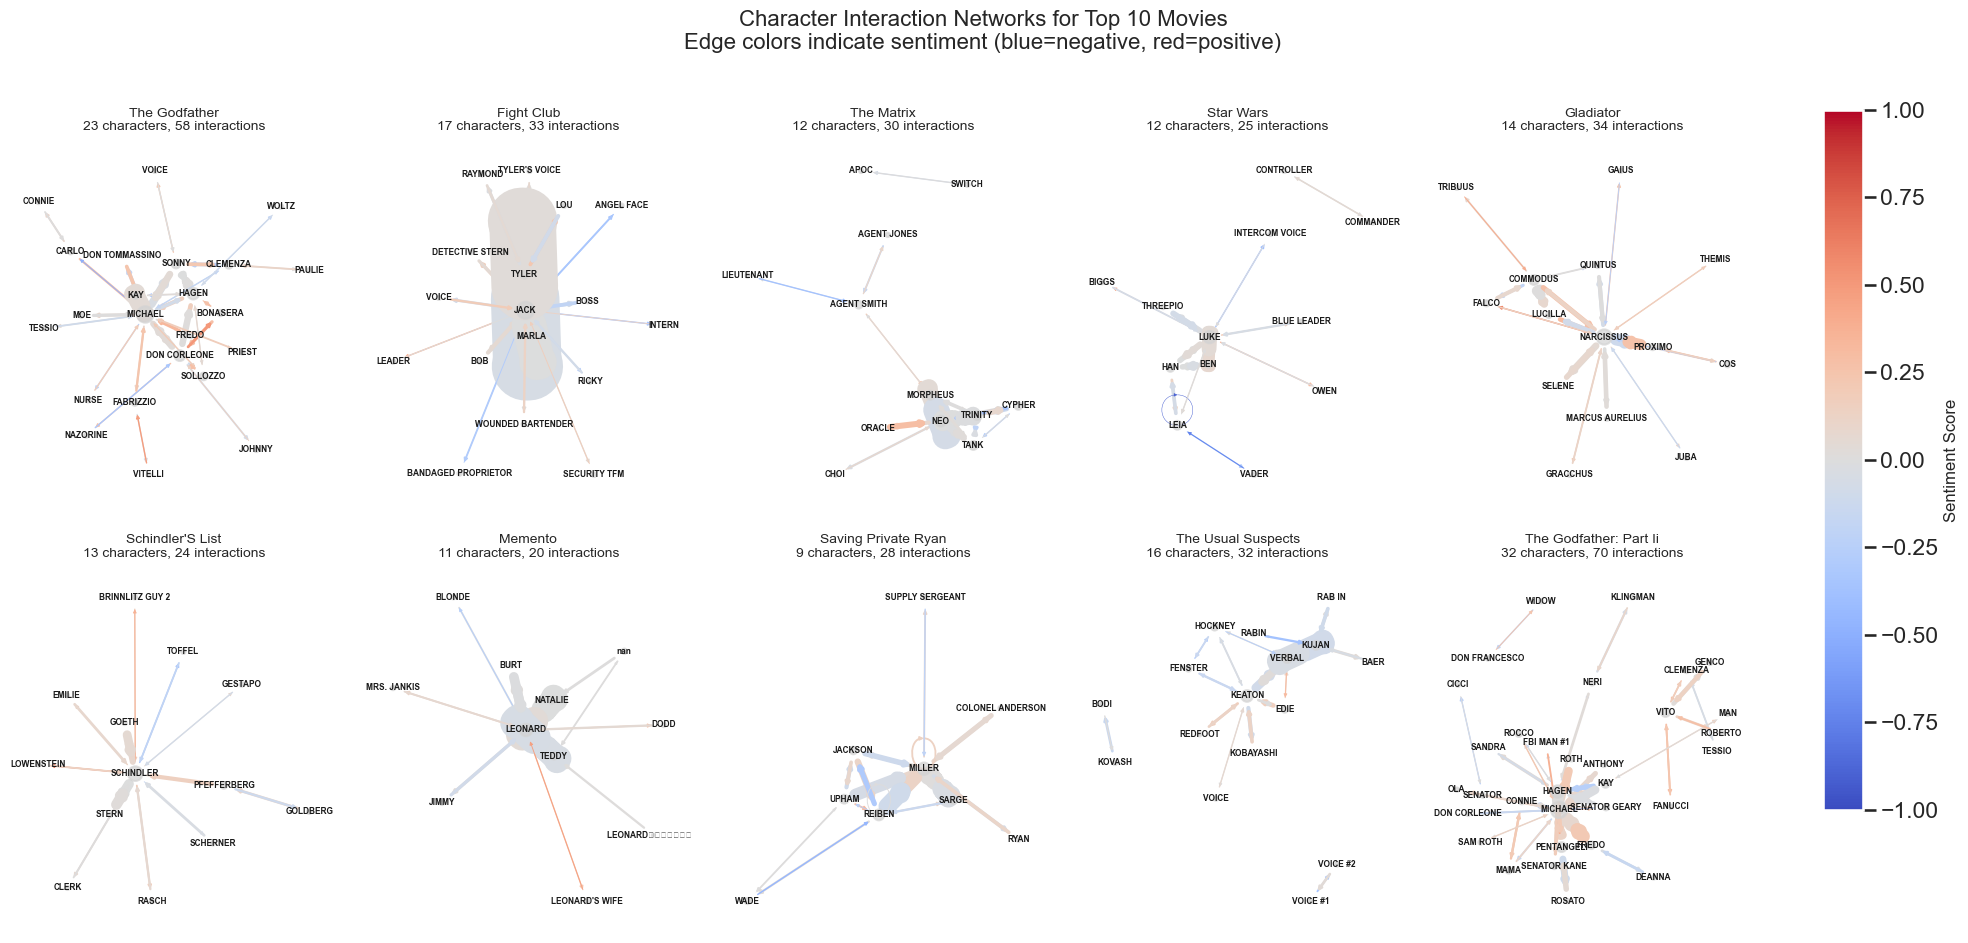

In [39]:
import warnings
warnings.filterwarnings("ignore")
# ignore future warnings
warnings.filterwarnings("ignore", category=FutureWarning)


movie_titles = pd.read_csv(f"{path}/movie_titles_metadata.txt", sep=r' \+\+\+\$\+\+\+ ', 
                          header=None, encoding='ISO-8859-1', engine='python',
                          names=['MovieID', 'Title', 'Year', 'Rating', 'Votes', 'Genres'])

# Get top 10 movies
top_10_movies = movie_titles.sort_values(['Votes', 'Rating'], ascending=[False, False]).head(10)

# Create a 2x5 subplot grid
fig, axes = plt.subplots(2, 5, figsize=(20,10))
fig.suptitle("Character Interaction Networks for Top 10 Movies\nEdge colors indicate sentiment (blue=negative, red=positive)", 
             fontsize=16, y=0.95) 

# Flatten axes for easier iteration
axes_flat = axes.flatten()

# Create plots for each movie
for idx, (_, movie) in enumerate(top_10_movies.iterrows()):
    ax = axes_flat[idx]
    movie_id = movie['MovieID']
    
    # Get movie conversations and create graph
    movie_convos = movie_conversations[movie_conversations['MovieID'] == movie_id]
    movie_lines_subset = movie_lines[movie_lines['MovieID'] == movie_id]
    char_names = dict(zip(movie_lines_subset['CharacterID'], movie_lines_subset['CharacterName']))
    
    # Create directed graph for movie
    MG = nx.DiGraph()
    
    # Build the graph with sentiment analysis
    for _, row in movie_convos.iterrows():
        try:
            conversation_ids = ast.literal_eval(row['Conversation'])
            for i in range(len(conversation_ids) - 1):
                line_id_1 = conversation_ids[i]
                line_id_2 = conversation_ids[i + 1]
                
                char1 = line_to_character.get(line_id_1)
                char2 = line_to_character.get(line_id_2)
                
                text = line_dict.get(line_id_1, '')
                sentiment = sia.polarity_scores(text)['compound']
                
                if char1 and char2:
                    if MG.has_edge(char1, char2):
                        old_sentiment = MG[char1][char2]['sentiment']
                        old_weight = MG[char1][char2]['weight']
                        new_sentiment = (old_sentiment * old_weight + sentiment) / (old_weight + 1)
                        MG[char1][char2]['sentiment'] = new_sentiment
                        MG[char1][char2]['weight'] += 1
                    else:
                        MG.add_edge(char1, char2, weight=1, sentiment=sentiment)
        except:
            continue
    
    # Create layout
    pos = nx.spring_layout(MG, k=4, iterations=200, seed=42)
    
    # Calculate node sizes and edge colors
    node_sizes = [MG.degree(n) * 5 for n in MG.nodes()]  # Reduced node size multiplier
    edge_colors = [MG[u][v]['sentiment'] for u, v in MG.edges()]
    
    # Draw nodes
    nx.draw_networkx_nodes(MG, pos,
                          node_color='lightgray',
                          node_size=node_sizes,
                          alpha=0.7,
                          ax=ax)
    
    # Draw edges
    edges = nx.draw_networkx_edges(MG, pos,
                                 edge_color=edge_colors,
                                 edge_cmap=plt.cm.coolwarm,
                                 edge_vmin=-1,
                                 edge_vmax=1,
                                 width=[MG[u][v]['weight']/3 for u, v in MG.edges()],  # Reduced width
                                 arrows=True,
                                 arrowsize=5,  # Reduced arrow size
                                 ax=ax)
    
    # Create labels dictionary
    labels = {node: char_names.get(node, str(node)) for node in MG.nodes()}
    
    # Draw labels with smaller font
    nx.draw_networkx_labels(MG, pos,
                           labels=labels,
                           font_size=6,  # Reduced font size
                           font_weight='bold',
                           ax=ax)
    
    # Set title
    ax.set_title(f"{movie['Title'].title()}\n{MG.number_of_nodes()} characters, {MG.number_of_edges()} interactions",
                 fontsize=10)
    ax.axis('off')

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm=plt.Normalize(vmin=-1, vmax=1))
sm.set_array([])
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = plt.colorbar(sm, cax=cbar_ax)
cbar.set_label('Sentiment Score', fontsize=12)

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

In [40]:
import ast
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
from IPython.display import Markdown, display

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Get top 10 movies
top_10_movies = movie_titles.sort_values(['Votes', 'Rating'], ascending=[False, False]).head(10)

# Dictionary to store average sentiment for each genre
genre_sentiments = {}

# Calculate average sentiment for each movie and correlate with genre
for _, movie in top_10_movies.iterrows():
    movie_id = movie['MovieID']
    movie_lines_subset = movie_lines[movie_lines['MovieID'] == movie_id]
    
    # Calculate sentiment for each line
    sentiments = []
    for text in movie_lines_subset['Text']:
        sentiment = sia.polarity_scores(text)['compound']
        sentiments.append(sentiment)
    
    # Calculate average sentiment
    if sentiments:
        average_sentiment = sum(sentiments) / len(sentiments)
    else:
        average_sentiment = 0
    
    # Get genres for the movie
    genres = movie['Genres'].split('|')  # Assuming genres are separated by '|'
    
    # Store average sentiment for each genre
    for genre in genres:
        if genre not in genre_sentiments:
            genre_sentiments[genre] = []
        genre_sentiments[genre].append(average_sentiment)



# Create a list to store the data for the DataFrame
data = []

for genre, sentiments in genre_sentiments.items():
    avg_genre_sentiment = sum(sentiments) / len(sentiments)
    # Get movie titles associated with the genre
    movies_in_genre = [movie['Title'] for _, movie in top_10_movies.iterrows() if genre in movie['Genres']]
    # Get the corresponding movie titles from the movie_titles dataframe
    movieTitles = movie_titles[movie_titles['Title'].isin(movies_in_genre)]
    # Append each movie title, its genre, and average sentiment to the data list
    for title in movieTitles['Title']:
        data.append({'Title': title.title(), 'Genres': genre, 'Average Sentiment': f"{avg_genre_sentiment:.3f}"})

# Create a DataFrame from the data list
df = pd.DataFrame(data)

# Convert the DataFrame to a markdown table without indexes
markdown_table = df.to_markdown(index=False)

print("Top 10 movies and their average sentiment:")
display(Markdown(markdown_table))


Top 10 movies and their average sentiment:


| Title                  | Genres                                                      |   Average Sentiment |
|:-----------------------|:------------------------------------------------------------|--------------------:|
| The Godfather          | ['crime', 'drama', 'thriller']                              |               0.053 |
| The Godfather: Part Ii | ['crime', 'drama', 'thriller']                              |               0.053 |
| Fight Club             | ['crime', 'drama', 'mystery', 'thriller']                   |              -0.012 |
| Memento                | ['crime', 'drama', 'mystery', 'thriller']                   |              -0.012 |
| The Matrix             | ['action', 'adventure', 'adventure', 'adventure', 'sci-fi'] |               0.007 |
| Star Wars              | ['action', 'adventure', 'fantasy', 'sci-fi']                |               0.012 |
| Gladiator              | ['action', 'adventure', 'drama']                            |               0.076 |
| Schindler'S List       | ['biography', 'drama', 'history', 'war']                    |               0.078 |
| Saving Private Ryan    | ['action', 'drama', 'history', 'war']                       |              -0.012 |
| The Usual Suspects     | ['crime', 'mystery', 'thriller']                            |              -0.049 |

In [42]:
# Load the rich speaker data
import pandas as pd

# Load the CSV file
rich_speaker_df = pd.read_csv('/Users/meliscemre/Desktop/2024-2025 Fall/Social Graphs and Interactions/Social Graph Repo/Social_Graphs_ExamProject/cornell_rich_speaker.csv')

# Display basic information about the dataset
print("Dataset Shape:", rich_speaker_df.shape)
print("\nColumns:", rich_speaker_df.columns.tolist())
print("\nFirst few rows:")
print(rich_speaker_df.head())

# Display some basic statistics
print("\nCharacter Statistics:")
print(f"Total number of characters: {len(rich_speaker_df)}")
print(f"Number of unique movies: {rich_speaker_df['movie_title'].nunique()}")
print(f"Number of characters with known actors: {rich_speaker_df['additional_info'].str.contains('Played by', na=False).sum()}")

# Distribution of age brackets
print("\nAge Bracket Distribution:")
print(rich_speaker_df['age_bracket'].value_counts())

# Distribution of genders
print("\nGender Distribution:")
print(rich_speaker_df['gender'].value_counts())

Dataset Shape: (863, 15)

Columns: ['name', 'movie_title', 'number_of_lines', 'age_bracket', 'profession', 'religion', 'country_of_origin', 'additional_info', 'quote', 'annotated', 'speaker_id', 'movie_id', 'gender', 'description', 'source']

First few rows:
     name                     movie_title  number_of_lines  age_bracket  \
0    alvy                      annie hall              500        Adult   
1  harold                harold and maude              244  Young Adult   
2   terry               on the waterfront              225        Adult   
3    weir                   event horizon              104        Adult   
4    duke  fear and loathing in las vegas              179        Adult   

          profession           religion country_of_origin  \
0           Comedian             Jewish               USA   
1            Student            Unknown               USA   
2        Dock Worker  Troubled Catholic               USA   
3  Starship Designer            Unknown       

In [43]:
rich_speaker_df["movie_title"].value_counts()

movie_title
all about eve         6
a hard day's night    6
very bad things       6
good will hunting     5
wild things           5
                     ..
rko 281               1
marty                 1
big fish              1
unbreakable           1
jaws                  1
Name: count, Length: 452, dtype: int64

In [44]:
rich_speaker_df.columns

Index(['name', 'movie_title', 'number_of_lines', 'age_bracket', 'profession',
       'religion', 'country_of_origin', 'additional_info', 'quote',
       'annotated', 'speaker_id', 'movie_id', 'gender', 'description',
       'source'],
      dtype='object')

In [45]:
# print all movie_titles

for movie_title in rich_speaker_df["additional_info"].unique():
    print(movie_title)



The film is from his perspective and introspective. Played by Woody Allen
nan
Played by Marlon Brando.
The film is set in 2047.
 
Played by Tim Robbins
Played by Robert De Niro
Voiced by Charles Fleischer. Designed by Richard Williams. 
Played by Celeste Holm. Is the supporting protagonist.
Played by Jeff Goldblum
Played by Colin Farrell. Not historically accurate. 
Played by Will Smith
Bree's full name is inconsistent throughout the movie (sometimes she is Bree Daniels, other times she is Bree Daniel. The end credits read Bree Daniel)
Played by Guy Pearce
Quincy is seen across different ages. The story takes place across four 'quarters'.
Played by John Wayne. 
Played by Jack Nicholson
Played by Morgan Freeman.
Played by Gene Wilder. Young Frankenstein is directed by Mel Brooks. He and Gene Wilder co-wrote the screenplay and screen-story.
Played by Harrison Ford
Played by Alexandra Paul
Played by Kevin Costner
Directed by Wes Anderson
Played by William Shatner
Played by Peter Weller
Pl

In [46]:
# Check if actor information exists in the additional_info column
actor_info = rich_speaker_df[
    rich_speaker_df['additional_info'].str.contains('Played by', na=False)
]

# Display any found actor information
print("Actors found in dataset:")
for _, row in actor_info.iterrows():
    print(f"Movie: {row['movie_title']}")
    print(f"Character: {row['name']}")
    print(f"Info: {row['additional_info']}")
    print("-" * 50)

Actors found in dataset:
Movie: annie hall
Character: alvy
Info: The film is from his perspective and introspective. Played by Woody Allen
--------------------------------------------------
Movie: on the waterfront
Character: terry
Info: Played by Marlon Brando.
--------------------------------------------------
Movie: bull durham
Character: nuke
Info: Played by Tim Robbins
--------------------------------------------------
Movie: wag the dog
Character: brean
Info: Played by Robert De Niro
--------------------------------------------------
Movie: all about eve
Character: karen
Info: Played by Celeste Holm. Is the supporting protagonist.
--------------------------------------------------
Movie: independence day
Character: david
Info: Played by Jeff Goldblum
--------------------------------------------------
Movie: american outlaws
Character: jesse
Info: Played by Colin Farrell. Not historically accurate. 
--------------------------------------------------
Movie: enemy of the state
Chara

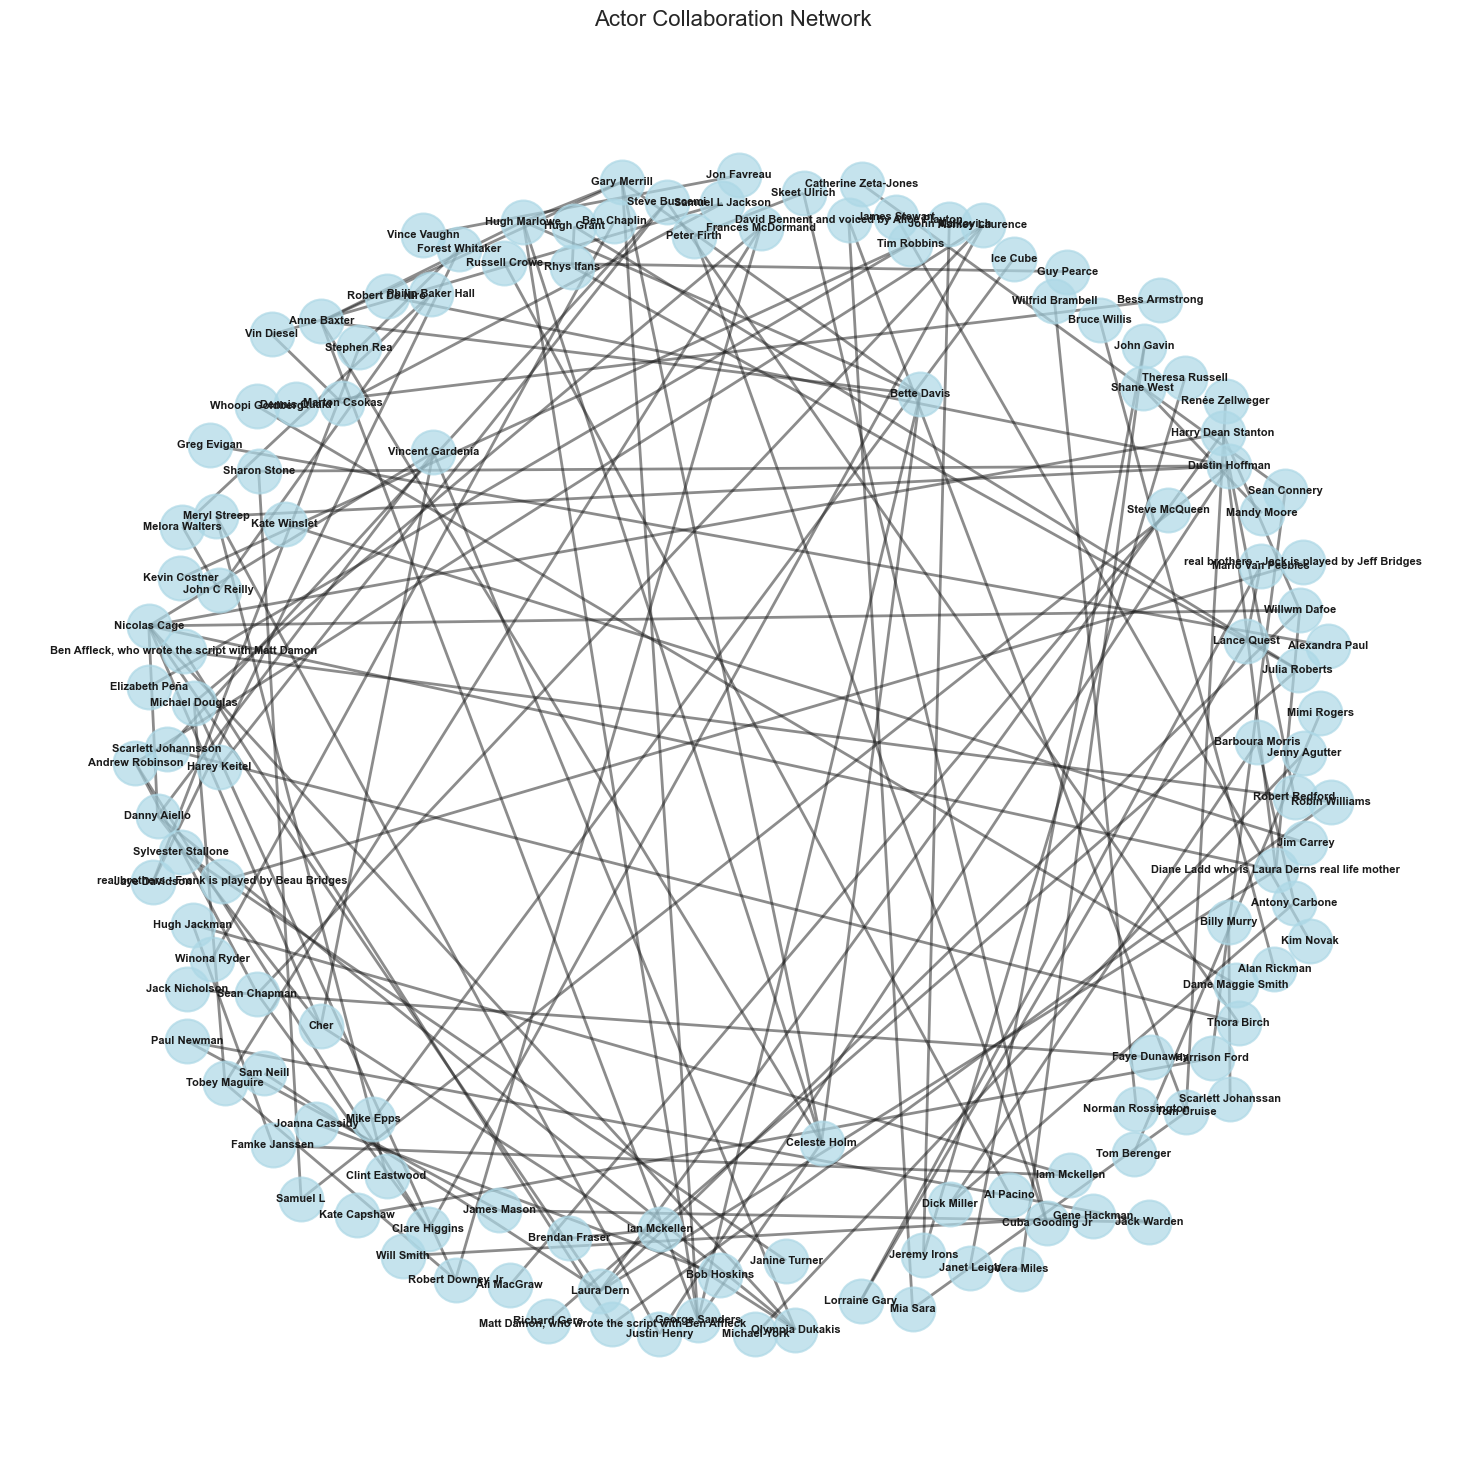


Network Statistics:
Number of actors: 129
Number of collaborations: 129
Average collaborations per actor: 1.00

Top 5 actors by number of collaborations:
Nicolas Cage: 8 collaborations
Dustin Hoffman: 6 collaborations
Bette Davis: 5 collaborations
Hugh Marlowe: 5 collaborations
Anne Baxter: 5 collaborations


In [47]:
import re
import networkx as nx
import matplotlib.pyplot as plt

# Create regex pattern to extract actor names
def extract_actor_name(info_text):
    if pd.isna(info_text):
        return None
    
    # Pattern matches "Played by" followed by a name, optionally followed by period or period and space
    pattern = r"Played by ([^\.]+)(?:\.|\.\s|$)"
    match = re.search(pattern, info_text)
    if match:
        return match.group(1).strip()
    return None

# Create a dictionary mapping movies to their actors
movie_actor_dict = {}

# Extract actors for each movie
for _, row in rich_speaker_df.iterrows():
    if pd.notna(row['additional_info']):
        actor = extract_actor_name(row['additional_info'])
        if actor:
            if row['movie_title'] not in movie_actor_dict:
                movie_actor_dict[row['movie_title']] = set()
            movie_actor_dict[row['movie_title']].add(actor)

# Create actor collaboration network
G_actors = nx.Graph()

# Add edges between actors who appeared in the same movie
for movie, actors in movie_actor_dict.items():
    # Add edges between all pairs of actors in the same movie
    actors = list(actors)
    for i in range(len(actors)):
        for j in range(i + 1, len(actors)):
            if G_actors.has_edge(actors[i], actors[j]):
                # Increment weight if they've worked together before
                G_actors[actors[i]][actors[j]]['weight'] += 1
            else:
                G_actors.add_edge(actors[i], actors[j], weight=1)

# Create visualization
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G_actors, k=2, iterations=50)

# Draw nodes
nx.draw_networkx_nodes(G_actors, pos, 
                      node_color='lightblue',
                      node_size=1000,
                      alpha=0.7)

# Draw edges with width based on weight
edge_weights = [G_actors[u][v]['weight'] for u, v in G_actors.edges()]
nx.draw_networkx_edges(G_actors, pos,
                      width=[w*2 for w in edge_weights],
                      alpha=0.5)

# Draw labels
nx.draw_networkx_labels(G_actors, pos,
                       font_size=8,
                       font_weight='bold')

plt.title("Actor Collaboration Network", pad=20, size=16)
plt.axis('off')
plt.tight_layout()
plt.show()

# Print some network statistics
print(f"\nNetwork Statistics:")
print(f"Number of actors: {G_actors.number_of_nodes()}")
print(f"Number of collaborations: {G_actors.number_of_edges()}")
print(f"Average collaborations per actor: {G_actors.number_of_edges()/G_actors.number_of_nodes():.2f}")

# Print actors with most collaborations
degree_centrality = nx.degree_centrality(G_actors)
print("\nTop 5 actors by number of collaborations:")
for actor, centrality in sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"{actor}: {G_actors.degree(actor)} collaborations")

In [48]:
# Create a dictionary to store movie collaborations
actor_movie_collabs = {}

# Build collaboration dictionary
for movie, actors in movie_actor_dict.items():
    actors = list(actors)
    for i in range(len(actors)):
        for j in range(i + 1, len(actors)):
            actor1, actor2 = actors[i], actors[j]
            collab_key = tuple(sorted([actor1, actor2]))
            if collab_key not in actor_movie_collabs:
                actor_movie_collabs[collab_key] = []
            actor_movie_collabs[collab_key].append(movie)

# Print collaborations for top 5 actors
print("Top 5 actors and their collaborations:")
print("-" * 50)
for actor, _ in sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"\nCollaborations for {actor}:")
    for edge in G_actors.edges(actor):
        collab_actor = edge[1]
        collab_key = tuple(sorted([actor, collab_actor]))
        movies = actor_movie_collabs[collab_key]
        print(f"- With {collab_actor} in: {', '.join(movies)}")

Top 5 actors and their collaborations:
--------------------------------------------------

Collaborations for Nicolas Cage:
- With Diane Ladd who is Laura Derns real life mother in: wild at heart
- With Laura Dern in: wild at heart
- With Willwm Dafoe in: wild at heart
- With Harry Dean Stanton in: wild at heart
- With Cher in: moonstruck
- With Danny Aiello in: moonstruck
- With Vincent Gardenia in: moonstruck
- With Olympia Dukakis in: moonstruck

Collaborations for Dustin Hoffman:
- With Robert De Niro in: wag the dog
- With Robert Redford in: all the president's men
- With Justin Henry in: kramer vs. kramer
- With Meryl Streep in: kramer vs. kramer
- With Sharon Stone in: sphere
- With Samuel L in: sphere

Collaborations for Bette Davis:
- With Hugh Marlowe in: all about eve
- With Anne Baxter in: all about eve
- With Celeste Holm in: all about eve
- With George Sanders in: all about eve
- With Gary Merrill in: all about eve

Collaborations for Hugh Marlowe:
- With Bette Davis in: 

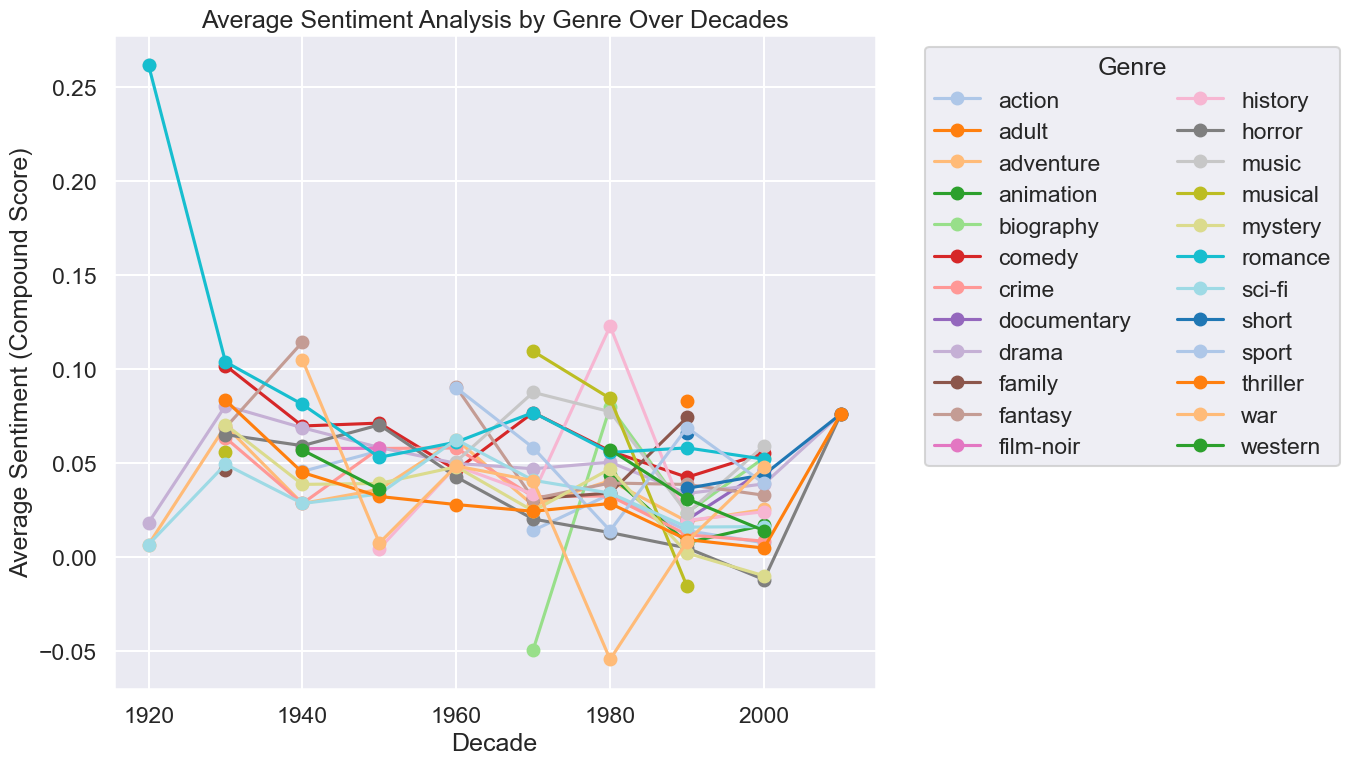

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import tab20  # Colormap for distinct colors
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Step 1: Merge movie_lines with movie_titles on MovieID
movies_merged_df = movie_lines.merge(movie_titles, on='MovieID')

# Step 2: Perform sentiment analysis on dialog text
movies_merged_df['sentiment'] = movies_merged_df['Text'].apply(lambda text: sia.polarity_scores(text)['compound'])

# Step 3: Clean the Genres column
movies_merged_df['Genres'] = (
    movies_merged_df['Genres']
    .astype(str)
    .str.replace("'", "", regex=False)  # Remove all single quotes
    .str.strip("[] ")  # Remove brackets and spaces
    .str.lower()  # Convert to lowercase
    .str.split(',')  # Split into a list
)

# Step 4: Explode the Genres column
movies_merged_df = movies_merged_df.explode('Genres')

# Step 5: Further clean after exploding
movies_merged_df['Genres'] = (
    movies_merged_df['Genres']
    .str.strip()  # Remove leading/trailing spaces
    .str.replace("'", "", regex=False)  # Remove any remaining single quotes
)

# Step 6: Ensure 'Year' is numeric and calculate decades
movies_merged_df['Year'] = pd.to_numeric(movies_merged_df['Year'], errors='coerce')
movies_merged_df = movies_merged_df.dropna(subset=['Year'])
movies_merged_df['Year'] = movies_merged_df['Year'].astype(int)
movies_merged_df['Decade'] = (movies_merged_df['Year'] // 10) * 10

# Step 7: Calculate average sentiment by Decade and Genre
decade_sentiment = (
    movies_merged_df.groupby(['Decade', 'Genres'])['sentiment']
    .mean()
    .reset_index()
)

# Step 8: Pivot the data for plotting (Decades as rows, Genres as columns)
pivot_table = decade_sentiment.pivot(index='Decade', columns='Genres', values='sentiment')

# Step 9: Assign unique colors dynamically
# Generate a colormap with enough colors for all genres
unique_genres = pivot_table.columns
colors = plt.cm.tab20.colors  # Get 20 distinct colors from the colormap
genre_colors = {genre: colors[i % len(colors)] for i, genre in enumerate(unique_genres)}

# Step 10: Plot sentiment trends for all genres by decade
plt.figure(figsize=(14, 8))

for genre in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[genre], marker='o', label=genre, color=genre_colors[genre])

plt.title('Average Sentiment Analysis by Genre Over Decades')
plt.xlabel('Decade')
plt.ylabel('Average Sentiment (Compound Score)')
plt.grid(True)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.tight_layout()
plt.show()


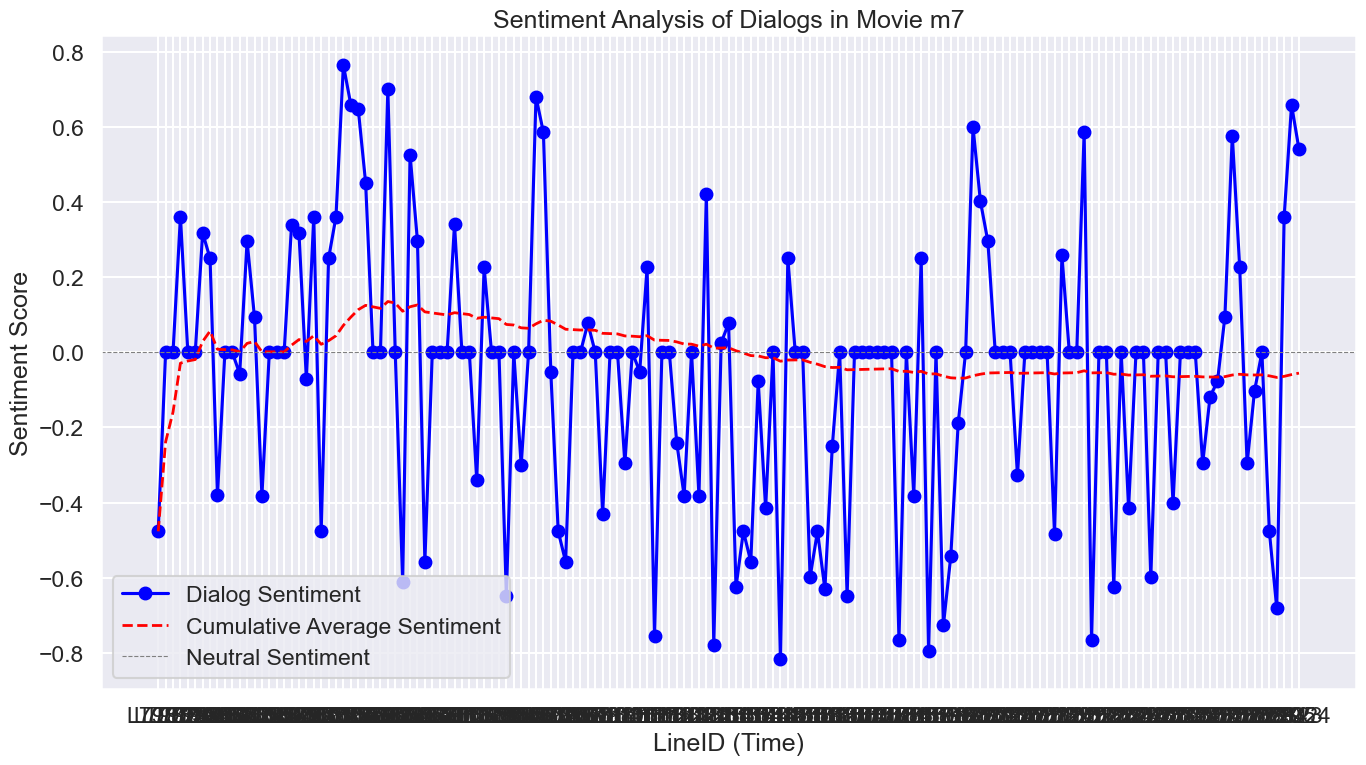

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Step 1: Filter data for the specific movie
movie_id_to_analyze = "m7"  # Replace with your MovieID
movie_lines_filtered = movie_lines[movie_lines['MovieID'] == movie_id_to_analyze]

# Step 2: Sort lines by LineID to ensure chronological order
movie_lines_filtered = movie_lines_filtered.sort_values(by='LineID')

# Step 3: Calculate sentiment score for each dialog
movie_lines_filtered['Sentiment'] = movie_lines_filtered['Text'].apply(lambda text: sia.polarity_scores(text)['compound'])

# Step 4: Calculate cumulative average sentiment
movie_lines_filtered['CumulativeAverage'] = movie_lines_filtered['Sentiment'].expanding().mean()

# Step 5: Plot sentiment score and cumulative average over time
plt.figure(figsize=(14, 8))

# Plot individual dialog sentiment
plt.plot(movie_lines_filtered['LineID'], movie_lines_filtered['Sentiment'], marker='o', linestyle='-', color='blue', label='Dialog Sentiment')

# Plot cumulative average sentiment
plt.plot(movie_lines_filtered['LineID'], movie_lines_filtered['CumulativeAverage'], color='red', linestyle='--', linewidth=2, label='Cumulative Average Sentiment')

# Add a neutral sentiment line
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8, label='Neutral Sentiment')

# Add labels, legend, and title
plt.title(f'Sentiment Analysis of Dialogs in Movie {movie_id_to_analyze}')
plt.xlabel('LineID (Time)')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


<Axes: >

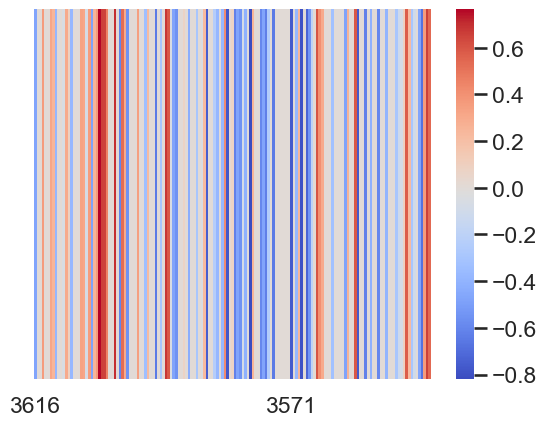

In [92]:
import seaborn as sns

sns.heatmap(
    movie_lines_filtered[['Sentiment']].T, 
    cmap='coolwarm', 
    cbar=True, 
    xticklabels=100, 
    yticklabels=False
)


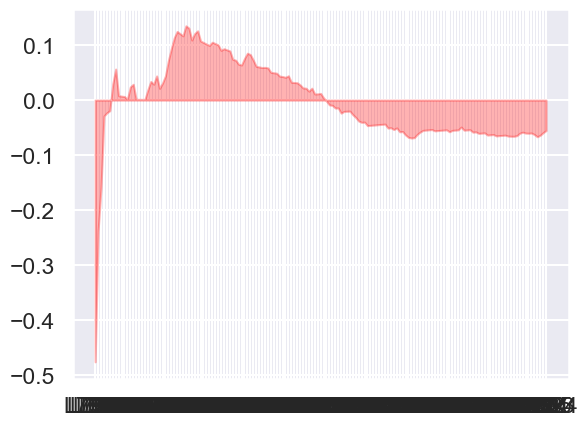

In [93]:
plt.fill_between(movie_lines_filtered['LineID'], movie_lines_filtered['CumulativeAverage'], color='red', alpha=0.3, label='Cumulative Sentiment')
